# Исследование объявлений о продаже квартир

**Задача исследования** 

Научиться определять рыночную стоимость объектов недвижимости и установить параметры, которые на нее влияют. 
Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

**Входные данные** 

Данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

* balcony — число балконов

* ceiling_height — высота потолков (м)

* cityCenters_nearest — расстояние до центра города (м)

* days_exposition — сколько дней было размещено объявление (от публикации до снятия)

* first_day_exposition — дата публикации

* floor — этаж

* floors_total — всего этажей в доме

* is_apartment — апартаменты (булев тип)

* kitchen_area — площадь кухни в квадратных метрах (м²)

* last_price — цена на момент снятия с публикации

* living_area — жилая площадь в квадратных метрах (м²)

* locality_name — название населённого пункта

* open_plan — свободная планировка (булев тип)

* parks_around3000 — число парков в радиусе 3 км

* parks_nearest — расстояние до ближайшего парка (м)

* ponds_around3000 — число водоёмов в радиусе 3 км

* ponds_nearest — расстояние до ближайшего водоёма (м)

* rooms — количество комнат

* studio — квартира-студия (булев тип)

* total_area — площадь квартиры в квадратных метрах (м²)

* total_images — число фотографий квартиры в объявлении


**Практическое применение результатов исследования**

Исследование позволит построить автоматизированную систему для отслеживания аномалий и мошеннической деятельности.

## Обзор данных

Импортируем библиотеки для проекта.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

Прочитаем данные и сохраним в переменную df.

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t') 

Посмотрим на данные: ссылка на переменную покажет и голову, и хвост датафрейма.

In [3]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Получим общую информацию о данных в датасете.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Видны пропуски в данных. Посмотрим на описательную статистику датафрейма. Для удобства уберем числа в экспоненциальной форме. 

In [5]:
pd.options.display.float_format = '{:.3f}'.format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.000,9.858,5.683,0.000,6.000,9.000,14.000,50.000
last_price,23699.000,6541548.772,10887013.268,12190.000,3400000.000,4650000.000,6800000.000,763000000.000
total_area,23699.000,60.349,35.654,12.000,40.000,52.000,69.900,900.000
rooms,23699.000,2.071,1.078,0.000,1.000,2.000,3.000,19.000
ceiling_height,14504.000,2.771,1.261,1.000,2.520,2.650,2.800,100.000
floors_total,23613.000,10.674,6.597,1.000,5.000,9.000,16.000,60.000
living_area,21796.000,34.458,22.030,2.000,18.600,30.000,42.300,409.700
floor,23699.000,5.892,4.885,1.000,2.000,4.000,8.000,33.000
kitchen_area,21421.000,10.570,5.905,1.300,7.000,9.100,12.000,112.000
balcony,12180.000,1.150,1.071,0.000,0.000,1.000,2.000,5.000


Посмотрим, есть ли явные дубликаты.

In [6]:
f'Количество явных дубликатов в данных: {df.duplicated().sum()}'

'Количество явных дубликатов в данных: 0'

Рассмотрим уникальные значения данных для остальных столбцов.

In [7]:
for column_name in df.columns:
    if column_name not in df.describe().columns:
        print(df[column_name].value_counts(), '\n') 

2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2018-05-20T00:00:00      1
2015-05-15T00:00:00      1
2015-01-12T00:00:00      1
2015-12-19T00:00:00      1
2015-07-19T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64 

False    2725
True       50
Name: is_apartment, dtype: int64 

False    23550
True       149
Name: studio, dtype: int64 

False    23632
True        67
Name: open_plan, dtype: int64 

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: local

## Вывод

<div style="border:solid green 2px; padding: 20px">
    
* Общее количество наблюдений в данных 23699. Объекты недвижимости описываются 22 признаками (в таблице 22 столбца). 
В 14 столбцах есть пропущенные значения.
    
* В датафрейме представлены данные разных типов: булев тип (2 столбца), строка (3 столбца), дробное число (14 столбцов), целое число (3 столбца). В некоторых случаях потребуется замена типа данных, к примеру дата публикации объявления - строка, а должна быть datetime, столбец is_apartment должен быть булевым, а не строкой. 

* Названия столбцов нужно привести к одной логике, к одну регистру и сделать более информативными. 
  
* Предварительно можно утверждать, что данных достаточно для проведения исследования.   

# Предобработка данных

## Изменим названия некоторых столбцов.

Чтобы они были более информативны.

In [8]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Переименуем столбцы с помощью функции rename() и словаря. 

In [9]:
(df.rename(columns={"total_area": "total_area_m2", "rooms": "number_of_rooms", "ceiling_height":"ceiling_height_m", 
                    "floors_total": "floors_in_house", "living_area": "living_area_m2",
                   "studio": "is_studio", "open_plan": "is_open_plan", 
                    "kitchen_area": "kitchen_area_m2", "balcony": "number_of_balconies",
                    "airports_nearest": "airports_nearest_m", "cityCenters_nearest": "city_center_distance_m",
                    "parks_nearest": "parks_nearest_m", "parks_around3000": "parks_within_3000m", 
                    "ponds_nearest":"ponds_nearest_m", "ponds_around3000": "ponds_within_3000m"}, inplace=True))

# Проверяем, что получилось:
df.columns

Index(['total_images', 'last_price', 'total_area_m2', 'first_day_exposition',
       'number_of_rooms', 'ceiling_height_m', 'floors_in_house',
       'living_area_m2', 'floor', 'is_apartment', 'is_studio', 'is_open_plan',
       'kitchen_area_m2', 'number_of_balconies', 'locality_name',
       'airports_nearest_m', 'city_center_distance_m', 'parks_within_3000m',
       'parks_nearest_m', 'ponds_within_3000m', 'ponds_nearest_m',
       'days_exposition'],
      dtype='object')

## Изменим порядок следования столбцов.

Для удобства работы с датасетом. Логика будет такая: где, что, сколько стоит, когда и остальная информация о близости к центру, о парках, водоемах ит.д. 

In [10]:
df.head()

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,floors_in_house,living_area_m2,floor,is_apartment,...,kitchen_area_m2,number_of_balconies,locality_name,airports_nearest_m,city_center_distance_m,parks_within_3000m,parks_nearest_m,ponds_within_3000m,ponds_nearest_m,days_exposition
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,...,25.000,NaN,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,NaN,11.000,18.600,1,NaN,...,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,NaN,5.000,34.300,4,NaN,...,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,NaN,14.000,NaN,9,NaN,...,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,...,41.000,NaN,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000


In [11]:
df = df[[
 'locality_name',  
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'number_of_balconies',
 'number_of_rooms',
 'floor',
 'floors_in_house',
 'is_apartment',
 'is_studio',
 'is_open_plan',  
 'total_images',
 'last_price',
 'first_day_exposition',
 'days_exposition',
 'city_center_distance_m',
 'airports_nearest_m',
 'parks_nearest_m', 
 'parks_within_3000m',
 'ponds_nearest_m',
 'ponds_within_3000m'
]]

Проверяем, что получилось:

In [12]:
df.head()

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_balconies,number_of_rooms,floor,floors_in_house,is_apartment,...,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,airports_nearest_m,parks_nearest_m,parks_within_3000m,ponds_nearest_m,ponds_within_3000m
0,Санкт-Петербург,108.000,51.000,25.000,2.700,NaN,3,8,16.000,NaN,...,20,13000000.000,2019-03-07T00:00:00,NaN,16028.000,18863.000,482.000,1.000,755.000,2.000
1,посёлок Шушары,40.400,18.600,11.000,NaN,2.000,1,1,11.000,NaN,...,7,3350000.000,2018-12-04T00:00:00,81.000,18603.000,12817.000,NaN,0.000,NaN,0.000
2,Санкт-Петербург,56.000,34.300,8.300,NaN,0.000,2,4,5.000,NaN,...,10,5196000.000,2015-08-20T00:00:00,558.000,13933.000,21741.000,90.000,1.000,574.000,2.000
3,Санкт-Петербург,159.000,NaN,NaN,NaN,0.000,3,9,14.000,NaN,...,0,64900000.000,2015-07-24T00:00:00,424.000,6800.000,28098.000,84.000,2.000,234.000,3.000
4,Санкт-Петербург,100.000,32.000,41.000,3.030,NaN,2,13,14.000,NaN,...,2,10000000.000,2018-06-19T00:00:00,121.000,8098.000,31856.000,112.000,2.000,48.000,1.000


##  Определим и изучим пропущенные значения в датасете.

Посмотрим на процент пропущенных значений в нашем датафрейме и выведем в отсортированном по убыванию виде:

In [13]:
df.isnull().mean().round(3).mul(100).sort_values(ascending=False)

is_apartment             88.300
parks_nearest_m          65.900
ponds_nearest_m          61.600
number_of_balconies      48.600
ceiling_height_m         38.800
airports_nearest_m       23.400
ponds_within_3000m       23.300
parks_within_3000m       23.300
city_center_distance_m   23.300
days_exposition          13.400
kitchen_area_m2           9.600
living_area_m2            8.000
floors_in_house           0.400
locality_name             0.200
first_day_exposition      0.000
last_price                0.000
total_images              0.000
total_area_m2             0.000
is_studio                 0.000
floor                     0.000
number_of_rooms           0.000
is_open_plan              0.000
dtype: float64

<a id='corr'></a> 
Прежде чем заполнять пропуски, посмотрим на матрицу корреляции с сырыми данными c помощью метода `corr()`. 

Это поможет нам примерно понять, от чего зависит тот или иной параметр и как лучше заполнять пропуски. 

In [14]:
#Создадим список интересных нам столбцов и по ним построим матрицу корреляции
cols = ['last_price', 'living_area_m2', 'floor', 'city_center_distance_m', 'number_of_rooms', 'ceiling_height_m', 'floors_in_house', 'days_exposition']
df[cols].corr()

,last_price,living_area_m2,floor,city_center_distance_m,number_of_rooms,ceiling_height_m,floors_in_house,days_exposition
last_price,1.000,0.566,0.027,-0.207,0.363,0.085,-0.007,0.081
living_area_m2,0.566,1.000,-0.097,-0.231,0.846,0.091,-0.169,0.142
floor,0.027,-0.097,1.000,0.009,-0.151,-0.012,0.678,-0.039
city_center_distance_m,-0.207,-0.231,0.009,1.000,-0.185,-0.092,0.020,-0.061
number_of_rooms,0.363,0.846,-0.151,-0.185,1.000,0.054,-0.228,0.127
ceiling_height_m,0.085,0.091,-0.012,-0.092,0.054,1.000,-0.029,0.019
floors_in_house,-0.007,-0.169,0.678,0.020,-0.228,-0.029,1.000,-0.052
days_exposition,0.081,0.142,-0.039,-0.061,0.127,0.019,-0.052,1.000


Виден высокий коэффициент коррреляции между количеством комнат и жилой площадью. И это отвечает здравому смыслу. Используем это при заполнении пропусков в столбце с жилой площадью.

Для начала создадим функцию, которая позволит нам быстро проверять результаты заполнения пропусков в столбце.

In [15]:
"""
Обе функции берут на вход строковые значения - название датафрейма и название столбца   и 
выводят на экран сообщение о количестве пропущенных значений в данном столбце данного датафрейма.
"""

def track_nan_filling_before(dataframe, column_name):
    return print(f'Количество пропущенных значений в столбце {column_name} до обработки: ', len(dataframe[dataframe[column_name].isnull()]))
    

In [16]:
def track_nan_filling_after(dataframe, column_name):
    return print(f'Количество пропущенных значений в столбце {column_name} после обработки: ', len(dataframe[dataframe[column_name].isnull()]))

Протестируем на функцию на отдельном значении.

In [17]:
track_nan_filling_before(df, 'living_area_m2')

Количество пропущенных значений в столбце living_area_m2 до обработки:  1903


### Столбец `is_apartment`

Скорее всего, пропуски в данном столбце связаны с тем, что если объект не является апартаментами, то человек ничего не проставлял в этом пункте. Заполним пропуски в таком случае булевым значением False.  

In [18]:
track_nan_filling_before(df, 'is_apartment')
df['is_apartment'] = df['is_apartment'].fillna(False)
track_nan_filling_after(df, 'is_apartment')

Количество пропущенных значений в столбце is_apartment до обработки:  20924
Количество пропущенных значений в столбце is_apartment после обработки:  0


Теперь значения в этом столбце имеют булев тип данных, как это и требуется. 

In [19]:
df['is_apartment'].dtypes

dtype('bool')

### Столбец `living_area_m2`

В столбце с жилой площадью отсутствует 8% значений. 

Заполним медианой в зависимости от количества комнат. Это решение подкреплено довольно высоким [коэффициентом корреляции Пирсона](#corr), равным 0.845977.

In [20]:
track_nan_filling_before(df, 'living_area_m2')

df['living_area_m2']= df['living_area_m2'].fillna(df.groupby(['number_of_rooms'])['living_area_m2'].transform('median'))

track_nan_filling_after(df, 'living_area_m2')

Количество пропущенных значений в столбце living_area_m2 до обработки:  1903
Количество пропущенных значений в столбце living_area_m2 после обработки:  0


### Столбец `number_of_balconies`

Пропуски в столбце с числом балконов, вероятнее всего, обусловлены тем, что балкона в таких случаях нет. Заполним такие пропуски значением 0.

In [21]:
track_nan_filling_before(df, 'number_of_balconies')
df['number_of_balconies'] = df['number_of_balconies'].fillna(0)
track_nan_filling_after (df, 'number_of_balconies')

Количество пропущенных значений в столбце number_of_balconies до обработки:  11519
Количество пропущенных значений в столбце number_of_balconies после обработки:  0


### Столбцы `floors_in_house`  и `locality_name`

In [22]:
df.columns

Index(['locality_name', 'total_area_m2', 'living_area_m2', 'kitchen_area_m2',
       'ceiling_height_m', 'number_of_balconies', 'number_of_rooms', 'floor',
       'floors_in_house', 'is_apartment', 'is_studio', 'is_open_plan',
       'total_images', 'last_price', 'first_day_exposition', 'days_exposition',
       'city_center_distance_m', 'airports_nearest_m', 'parks_nearest_m',
       'parks_within_3000m', 'ponds_nearest_m', 'ponds_within_3000m'],
      dtype='object')

Пропуски в столбцах с этажностью дома и названием населенного пункта составляют очень маленький процент (0.4% и 0.2% соответственно), заполнить их более и менее точными значениями не представляется возможным. По этой причине строки с пропущенными значениями в `floors_in_house` удалим, а пропуски в `locality_name` иожно заполнить строкой 'unknown'.

In [23]:
track_nan_filling_before(df, 'floors_in_house')
track_nan_filling_before(df, 'locality_name')

#Подаем в метод dropna список столбцов, в которых ищем NaN и удаляем строки
df.dropna(subset=['floors_in_house'], inplace=True)
df['locality_name'] = df['locality_name'].fillna('unknown')

track_nan_filling_after(df, 'floors_in_house')
track_nan_filling_after(df, 'locality_name')

Количество пропущенных значений в столбце floors_in_house до обработки:  86
Количество пропущенных значений в столбце locality_name до обработки:  49
Количество пропущенных значений в столбце floors_in_house после обработки:  0
Количество пропущенных значений в столбце locality_name после обработки:  0


### Столбец `ceiling_height_m`

Высота потолков может существенно влиять на цену недвижимости, а также пропусков в этих данных достаточно много - 38 % (если просто удалить эти строки, мы потеряем немало данных), поэтому пропуски в  столбце ceiling_height мы заполним значением медианы в зависимости от жилой площади. Как правило, чем больше площадь комнаты - тем выше в среднем потолок. И это подтверждает и коэффициент корреляции в нашей матрице корреляций: он здесь выше, чем в других случаях. Попробуем заполнить пропуски медианой значений ceiling_height в зависимости от жилой площади. 

In [24]:
track_nan_filling_before(df, 'ceiling_height_m')

df['ceiling_height_m']= df['ceiling_height_m'].fillna(df.groupby(['living_area_m2'])['ceiling_height_m'].transform('median'))

track_nan_filling_after(df, 'ceiling_height_m')

Количество пропущенных значений в столбце ceiling_height_m до обработки:  9118
Количество пропущенных значений в столбце ceiling_height_m после обработки:  428


У нас остались  пропущенные значения, потому что для каких-то значений в группировочном столбце c living_area_m2 вообще нет заполненных значений по целевому столбцу ceiling_height_m. 
Заполним в таком случае пропущенные значения общей медианой для высота потолков.

In [25]:
#Посмотрим, чему равна медиана в столбце ceiling_height_m:
df['ceiling_height_m'].median()

2.645

In [26]:
track_nan_filling_before(df, 'ceiling_height_m')

df['ceiling_height_m']= df['ceiling_height_m'].fillna(df['ceiling_height_m'].median())

track_nan_filling_after(df, 'ceiling_height_m')

Количество пропущенных значений в столбце ceiling_height_m до обработки:  428
Количество пропущенных значений в столбце ceiling_height_m после обработки:  0


Проверим теперь описательную статистику для высоты потолков.

In [27]:
df["ceiling_height_m"].describe()

count   23613.000
mean        2.727
std         0.993
min         1.000
25%         2.550
50%         2.645
75%         2.750
max       100.000
Name: ceiling_height_m, dtype: float64

Значения среднего, медианы и квартилей в пределах нормы: для стандартного жилья минимальная высота потолка 2,4 м. В новостройках обычно это значение находится в пределах 2,5-2,7 метра. Для элитного жилья показатель может превышать 3 метр по данным [статьи](https://stone-floor.ru/stati/optimalnaya-visota-potolka#:~:text=%D0%9A%D0%B0%D0%BA%D0%BE%D0%B2%D0%B0%20%D1%81%D0%B8%D1%82%D1%83%D0%B0%D1%86%D0%B8%D1%8F%20%D0%B2%20%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8%3F,%D0%BF%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%20%D0%BC%D0%BE%D0%B6%D0%B5%D1%82%20%D0%BF%D1%80%D0%B5%D0%B2%D1%8B%D1%88%D0%B0%D1%82%D1%8C%203%20%D0%BC%D0%B5%D1%82%D1%80%D0%B0.).

### Столбец `days_exposition` (длительность размещения объявления)

В столбце days_exposition пропущено 13,4%. 

Посмотрим на количество пустых значений days_exposition по годам, чтобы понять, связаны ли пропуски в этом столбце с тем, что на момент импорта данных объявления были еще актуальны.

In [28]:
#Создам копию исходного датафрейма
df_cp = df.copy() 

#Поменяю тип данных для  first_day_exposition, чтобы потом извлечь легко оттуда год
df_cp['first_day_exposition'] = pd.to_datetime(df_cp['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#Создаю столбец с годом 
df_cp['year'] = df_cp['first_day_exposition'].dt.year

#Группирую данные с пропусками в days_exposition по годам: 
df_cp[df_cp['days_exposition'].isnull()].groupby('year').count()


,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_balconies,number_of_rooms,floor,floors_in_house,is_apartment,...,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,airports_nearest_m,parks_nearest_m,parks_within_3000m,ponds_nearest_m,ponds_within_3000m
year,,,,,,,,,,,,,,,,,,,,,
2014,18,18,18,18,18,18,18,18,18,18,...,18,18,18,0,15,15,12,15,4,15
2015,70,70,70,64,70,70,70,70,70,70,...,70,70,70,0,59,59,37,59,38,59
2016,67,67,67,65,67,67,67,67,67,67,...,67,67,67,0,46,46,27,46,21,46
2017,271,271,271,251,271,271,271,271,271,271,...,271,271,271,0,204,204,132,204,131,204
2018,958,958,958,901,958,958,958,958,958,958,...,958,958,958,0,662,660,342,662,356,662
2019,1788,1788,1788,1674,1788,1788,1788,1788,1788,1788,...,1788,1788,1788,0,1321,1322,593,1322,664,1322


In [29]:
print('В датасете данные за период: ', df_cp['year'].min(), '-', df_cp['year'].max())

В датасете данные за период:  2014 - 2019


Наибольшее число пропущенных значений для последнего года, 2019. 

Да, похоже, действительно у нас пропуски в days_exposition в основном связаны с тем, что объявления на момент выгрузки данных были актуальны. Оставляем пропущенные значения в данном столбце.

### Столбец `kitchen_area_m2`

Пропуски в столбце с площадью кухни составляют 9.6%. Эти данные необходимы для исследования и мы можем примерно логически вычислить эти значения.
Сначала заполним пропущенные значения 0, потом вычислим медиану для площади кухни и общей площади; узнаем, какую долю от общей площади составляет площадь кухни и найдем площадь кухни, умножая общую площадь на этот коэффициент. Для квартир-студий площадь кухни таким образом не рассчитываем. 

In [30]:
track_nan_filling_before(df, 'kitchen_area_m2')
df['kitchen_area_m2'] = df['kitchen_area_m2'].fillna(0)
print ('Количество значений 0 в столбце kitchen_area_m2 после обработки: ', len(df.query('kitchen_area_m2 == 0')))

Количество пропущенных значений в столбце kitchen_area_m2 до обработки:  2231
Количество значений 0 в столбце kitchen_area_m2 после обработки:  2231


Применим метод **where** из библиотеки numpy для вычисления площади кухни.


In [31]:
df.columns

Index(['locality_name', 'total_area_m2', 'living_area_m2', 'kitchen_area_m2',
       'ceiling_height_m', 'number_of_balconies', 'number_of_rooms', 'floor',
       'floors_in_house', 'is_apartment', 'is_studio', 'is_open_plan',
       'total_images', 'last_price', 'first_day_exposition', 'days_exposition',
       'city_center_distance_m', 'airports_nearest_m', 'parks_nearest_m',
       'parks_within_3000m', 'ponds_nearest_m', 'ponds_within_3000m'],
      dtype='object')

In [32]:
df['kitchen_area_m2'] = np.where((df['kitchen_area_m2'] == 0) & 
                               (df['is_studio'] == False), # условие исключает расчет площади кухни для квартир-студий, что логично (кухня там совмещена с комнатой)
                               df['total_area_m2'] *  (df['kitchen_area_m2'].median() / df['total_area_m2'].median()), #каким значением заменяем 
                               df['kitchen_area_m2'] # в каком столбце делаем замену
                             )

In [33]:
print('Количество пропущенных значений в столбце kitchen_area после обработки: ', len(df[df["kitchen_area_m2"].isnull()]))

Количество пропущенных значений в столбце kitchen_area после обработки:  0


### Другие столбцы

Мы не можем подставить логическую замену или как-то вычислить пропущенные значения в столбцах ниже, данные по которым собирались автоматически: 

* parks_within_3000m 
* ponds_within_3000m 
* airports_nearest_m
* ponds_within_3000m
* parks_around3000  
* city_center_distance_m 

Мы не можем заполнить пропуски в этих случаях без искажения информации - оставим пропуски в данных столбцах.

Также посмотрим на процент пропущенных значений в столбце city_center_distance_m для Санкт-Петербурга.

In [34]:
df[df['locality_name'] == 'Санкт-Петербург']['city_center_distance_m'].isna().mean()*100

0.3833620854897451

Из всех квартир Санкт-Петербурга информация по расстоянию до центра отсутствует всего лишь для 0,4% квартир.

Проверим теперь, сколько пропущенных значений осталось в наших данных 

In [35]:
df.isna().mean()

locality_name            0.000
total_area_m2            0.000
living_area_m2           0.000
kitchen_area_m2          0.000
ceiling_height_m         0.000
number_of_balconies      0.000
number_of_rooms          0.000
floor                    0.000
floors_in_house          0.000
is_apartment             0.000
is_studio                0.000
is_open_plan             0.000
total_images             0.000
last_price               0.000
first_day_exposition     0.000
days_exposition          0.134
city_center_distance_m   0.233
airports_nearest_m       0.234
parks_nearest_m          0.659
parks_within_3000m       0.233
ponds_nearest_m          0.616
ponds_within_3000m       0.233
dtype: float64

### Вывод

<div style="border:solid green 2px; padding: 20px"> 

* Мы избавились от пропусков в ключевых для нашего исследования столбцах, предложили логичную замену там, где это возможно:
     

    В столбце с информацией о том, является ли объект апартаментами, заполнили нулями. 

    В столбце с жилой площадью заполнили медианой в зависимости от количества комнат. 

    В столбце с числом балконов заполнили нулями. 

    В столбце с этажностью дома пропуски составляли лишь 4% -  удалили эти строки. 

    В столбце с названием населенного пункта - заполнили строковым значением 'unknown'.

    В столбце с площадью кухни -  заполнили отношением медианы площади кухни к медиане общей площади, умноженным на общую площадь.  
    
* Пропуски в столбцах с расстоянием до ближайшего аэропорта, парка, пруда, число парков и прудов в радиусе 3 км мы решили оставить, поскольку не можем подставить логически или вычислить пропущенные значения в них без искажения реальной картины. 
  
* Пропущенные значения в столбце с расстоянием до центра мы оставляем как есть, потому что обработать корректно, не добавляя шума в данных, нельзя, при этом из всех значений в этом столбце нас будут интересовать только значения для квартир Санкт-Петербурга, а в таком случае пропущено всего лишь 0.4 %, что допустимо для данного исследования. 
   

## Приведем данные к нужным типам

Посмотрим в начале на типы данных в нашем датафрейме с помощью атрибута **dtypes**.

In [36]:
df.dtypes

locality_name              object
total_area_m2             float64
living_area_m2            float64
kitchen_area_m2           float64
ceiling_height_m          float64
number_of_balconies       float64
number_of_rooms             int64
floor                       int64
floors_in_house           float64
is_apartment                 bool
is_studio                    bool
is_open_plan                 bool
total_images                int64
last_price                float64
first_day_exposition       object
days_exposition           float64
city_center_distance_m    float64
airports_nearest_m        float64
parks_nearest_m           float64
parks_within_3000m        float64
ponds_nearest_m           float64
ponds_within_3000m        float64
dtype: object

В столбце `first_day_exposition` у нас хранится дата публикации объявления, однако тип данных в столбце - object (строка). Преобразуем строку в datetime. 

Чтобы увидеть формат, посмотрим на любое значение.

In [37]:
df['first_day_exposition'][0]

'2019-03-07T00:00:00'

Применим метод **to_datetime** к столбцу с датой и зададим формат, к которому нужно преобразовать строку с датой.

In [38]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [39]:
df['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23613, dtype: datetime64[ns]

Теперь все хорошо: тип данных для даты - datetime64. 

Дальше с датой мы можем проводить разные операции: выделять день недели, месяц и год публикации. Если бы дата была строкой, то это было бы проблематично.

В столбцах `number_of_balconies`, `floors_in_house`, `days_exposition` (длительность размещения объявления) данные хранятся в виде дробных чисел, заменим на целые числа - тип int64. 

Применим метод **astype** к датафрейму и подадим в него словарь с нужными столбцами и типами данных для замены. 
Для исключения в случае пропусков выставим errors='ignore'.

In [40]:
df = df.astype({'floors_in_house': 'int64', 'number_of_balconies': 'int64', 'days_exposition': 'int64'}, errors='ignore')

Проверим результаты преобразований типов данных.

In [41]:
df.dtypes

locality_name                     object
total_area_m2                    float64
living_area_m2                   float64
kitchen_area_m2                  float64
ceiling_height_m                 float64
number_of_balconies                int64
number_of_rooms                    int64
floor                              int64
floors_in_house                    int64
is_apartment                        bool
is_studio                           bool
is_open_plan                        bool
total_images                       int64
last_price                       float64
first_day_exposition      datetime64[ns]
days_exposition                  float64
city_center_distance_m           float64
airports_nearest_m               float64
parks_nearest_m                  float64
parks_within_3000m               float64
ponds_nearest_m                  float64
ponds_within_3000m               float64
dtype: object

## Работа с текстом (названием населенного пункта)

Прежде посмотрим количество уникальных населенных пунктов в столбце "locality_name".

In [42]:
f"Количество уникальных населенных пунктов в нашем датасете: {len(df['locality_name'].unique())}"

'Количество уникальных населенных пунктов в нашем датасете: 365'

In [43]:
df['locality_name']

0            Санкт-Петербург
1             посёлок Шушары
2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name, Length: 23613, dtype: object

У нас есть два варианта написания слова "поселок" - через 'е' и 'ё'. Мы унифицируем запись: заменим везде на 'е'.

In [44]:
# Меняем во всех названия насленного пункта 'е' и 'ё':
df['locality_name'] = df.locality_name.str.replace('ё', 'е')

In [45]:
df['locality_name']

0            Санкт-Петербург
1             поселок Шушары
2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name, Length: 23613, dtype: object

In [46]:
f"Количество уникальных населенных пунктов в нашем датасете: {len(df['locality_name'].unique())}"

'Количество уникальных населенных пунктов в нашем датасете: 331'

Были неявные дубли в значениях столбца с населенным пунктом - исправили. 

Посмотрим, как теперь выглядит наш датафрейм после предобработки:

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   locality_name           23613 non-null  object        
 1   total_area_m2           23613 non-null  float64       
 2   living_area_m2          23613 non-null  float64       
 3   kitchen_area_m2         23613 non-null  float64       
 4   ceiling_height_m        23613 non-null  float64       
 5   number_of_balconies     23613 non-null  int64         
 6   number_of_rooms         23613 non-null  int64         
 7   floor                   23613 non-null  int64         
 8   floors_in_house         23613 non-null  int64         
 9   is_apartment            23613 non-null  bool          
 10  is_studio               23613 non-null  bool          
 11  is_open_plan            23613 non-null  bool          
 12  total_images            23613 non-null  int64 

# Посчитаем и добавим в таблицу

## Подсчет цены за 1 квадратный метр

Вычислим цену за 1 кв м, поделив стоимость квартиры на общую площадь и округлив стоимость с помощью функции round.

In [48]:
df['price_per_m2'] = round(df['last_price'] / df['total_area_m2'])
df['price_per_m2']

0       120370.000
1        82921.000
2        92786.000
3       408176.000
4       100000.000
           ...    
23694    72491.000
23695    52542.000
23696    44092.000
23697   149511.000
23698    41796.000
Name: price_per_m2, Length: 23613, dtype: float64

## Добавление дня недели, месяца и года публикации объявления

Найдем день недели и запишем в отдельный столбец нашего датафрейма, используя методы **weekday, month, year** класса **datetime** :

In [49]:
# Запишем в отдельный столбец нашего датафрейма день недели, месяц, год:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

Проверим, что у нас получилось:

In [50]:
df[['first_day_exposition','weekday', 'month', 'year']]

,first_day_exposition,weekday,month,year
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018
...,...,...,...,...
23694,2017-03-21,1,3,2017
23695,2018-01-15,0,1,2018
23696,2018-02-11,6,2,2018
23697,2017-03-28,1,3,2017


День 0 - это понедельник.

## Категоризация данных об этаже квартиры

Посмотрим в начале, какие у нас значения в столбце `floor`.

In [51]:
df['floor'].value_counts(ascending=False).to_frame()

,floor
2,3366
3,3069
1,2914
4,2794
5,2617
6,1296
7,1214
8,1075
9,1046
10,684


Категоризуем эти данные с помощью функции.

In [52]:
"""
Функция возвращает категорию этажа по значению этажа (floor) и этажности дома (floors_in_house), используя правила:
- 'первый', если этаж 1
- 'последний',  если этаж квартиры совпадает с этажностью дома
- 'другой' во всех остальных случаях
"""

def get_floor_category(row):
    
    floor = row['floor']
    total_floors = row['floors_in_house']
    
    if floor == 1:
        return 'первый этаж'
    
    elif floor == total_floors:
        return 'последний этаж'
    
    else:
        return 'другой'

Протестируем функцию на игрушечном датафрейме.

In [53]:
row = pd.Series(data=[9,9], index=['floor', 'floors_in_house']) 
get_floor_category(row)

'последний этаж'

Применим функцию по категоризации этажей к столбцам нашего датафрейма и запишем результат в новый столбец `floor_category`.

In [54]:
df['floor_category'] = df.apply(get_floor_category, axis=1)

Проверим, что у нас получилось.

In [55]:
df[['floor', 'floors_in_house', 'floor_category']]

,floor,floors_in_house,floor_category
0,8,16,другой
1,1,11,первый этаж
2,4,5,другой
3,9,14,другой
4,13,14,другой
...,...,...,...
23694,3,5,другой
23695,4,5,другой
23696,1,3,первый этаж
23697,12,17,другой


## Отношение жилой и общей площади

In [56]:
df.columns

Index(['locality_name', 'total_area_m2', 'living_area_m2', 'kitchen_area_m2',
       'ceiling_height_m', 'number_of_balconies', 'number_of_rooms', 'floor',
       'floors_in_house', 'is_apartment', 'is_studio', 'is_open_plan',
       'total_images', 'last_price', 'first_day_exposition', 'days_exposition',
       'city_center_distance_m', 'airports_nearest_m', 'parks_nearest_m',
       'parks_within_3000m', 'ponds_nearest_m', 'ponds_within_3000m',
       'price_per_m2', 'weekday', 'month', 'year', 'floor_category'],
      dtype='object')

Вычислим отношение жилой площади к общей. Результат запишем в новый столбец `living_to_total_area_m2`.

In [57]:
df['living_to_total_area_m2'] = df['living_area_m2'] / df['total_area_m2']

In [58]:
df['living_to_total_area_m2']

0       0.472
1       0.460
2       0.612
3       0.283
4       0.320
         ... 
23694   0.548
23695   0.644
23696   0.524
23697   0.397
23698   0.381
Name: living_to_total_area_m2, Length: 23613, dtype: float64

## Отношение площади кухни к общей площади

Вычислим отношение площади кухни к общей площади.

In [59]:
df['kitchen_to_total_area_m2'] = df['kitchen_area_m2'] / df['total_area_m2']
df['kitchen_to_total_area_m2']

0       0.231
1       0.272
2       0.148
3       0.173
4       0.410
         ... 
23694   0.103
23695   0.144
23696   0.173
23697   0.304
23698   0.279
Name: kitchen_to_total_area_m2, Length: 23613, dtype: float64

Посмотрим на обогащенный датафрейм.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   locality_name             23613 non-null  object        
 1   total_area_m2             23613 non-null  float64       
 2   living_area_m2            23613 non-null  float64       
 3   kitchen_area_m2           23613 non-null  float64       
 4   ceiling_height_m          23613 non-null  float64       
 5   number_of_balconies       23613 non-null  int64         
 6   number_of_rooms           23613 non-null  int64         
 7   floor                     23613 non-null  int64         
 8   floors_in_house           23613 non-null  int64         
 9   is_apartment              23613 non-null  bool          
 10  is_studio                 23613 non-null  bool          
 11  is_open_plan              23613 non-null  bool          
 12  total_images      

Необходимые расчеты добавлены в таблицу, можно приступать к исследовательскому анализу данных.

# Исследовательский анализ данных

## Распределение значений в данных

### Стоимость квартиры

Построим с ходу гистограмму для цены с помощью библиотеки seaborn.

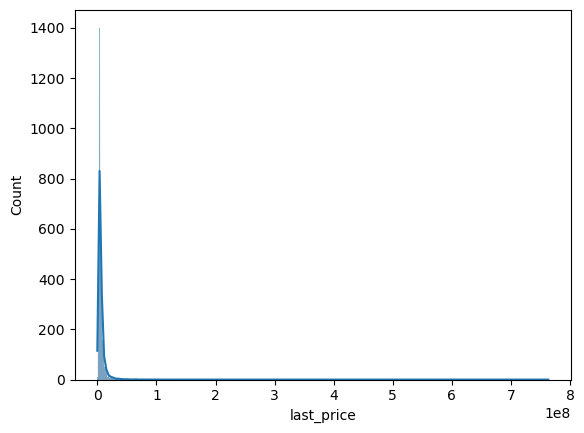

In [61]:
sns.histplot(data=df, x='last_price', kde=True);

Узкий пик до 40 000 000 и дальше длинный хвост из маленького количества значений, который скрадывает все остальные данные. У нас скошенное распределение. Попробуем отсечь выбросы и посмотреть поближе.

Построим также ящик с усами, или диаграмму размаха, чтобы оценить распределение и увидеть характерный разброс

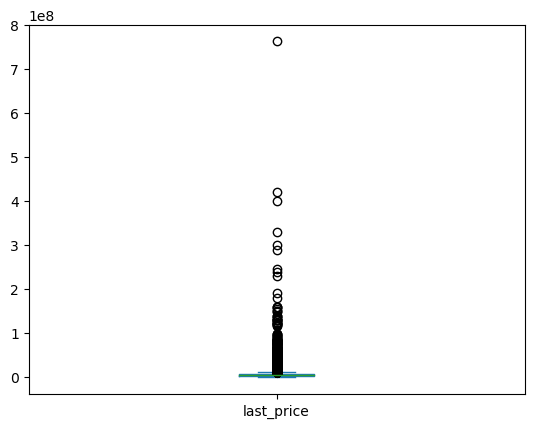

In [62]:
df['last_price'].plot.box();

Наш ящик оказался сжат выбросами, которых много и все они лежат выше верхнего межквартильного размаха. Уберем выбросы. 
Посмотрим, с какими значениями будем работать c помощью метода describe:

In [63]:
df['last_price'].describe()

count       23613.000
mean      6540555.461
std      10901722.738
min         12190.000
25%       3400000.000
50%       4650000.000
75%       6799000.000
max     763000000.000
Name: last_price, dtype: float64

Посчитаем первый квартиль, третий квартиль и вычислим межквартильный размах.

In [64]:
q1 = df['last_price'].quantile(0.25)
q3 = df['last_price'].quantile(0.75)
iqr = q3 - q1

In [65]:
f'Первый квартиль, 25%: {q1}'

'Первый квартиль, 25%: 3400000.0'

In [66]:
f'Третий квартиль, 75%: {q3}'

'Третий квартиль, 75%: 6799000.0'

In [67]:
f'Межквартильный размах, расстояние между третьим квартилем и первым: {iqr}'

'Межквартильный размах, расстояние между третьим квартилем и первым: 3399000.0'

In [68]:
f"Не более 1% квартир имеют стоимость жилья выше {np.percentile(df['last_price'], 99)} рублей"

'Не более 1% квартир имеют стоимость жилья выше 36000000.0 рублей'

Сделаем срез: уберем из нашего датасета все данные, которые лежат выше верхнего уса на нашем графике, то есть мы пока не будем рассматривать квартиры с очень высокой стоимостью на графике. Напомним, что «усы» ящика простираются влево и вправо от границ ящика на расстояние, равное 1,5 межквартильного размаха. В размах усов попадают нормальные значения, а за пределами находятся выбросы. 

In [69]:
#третий квартиль + полтора межквартильного размаха
dfq = df.query('last_price <= @q3 + 1.5 * @iqr') 

In [70]:
#Посмотрим, сколько данных мы отрезали:
f'Мы отрезали {1 - dfq.shape[0] / df.shape[0]:.1%} данных.'

'Мы отрезали 8.7% данных.'

Это довольно много. Элитное жилье можно рассмотреть отдельно.

Сделаем срез данных - создадим отдельную переменную для сегмента элитного жилья.

In [71]:
high_price = df.query('last_price >= @q3 + 1.5 * @iqr')  

Теперь снова построим гистограмму для стоимости квартир без учета выбросов - данных, которые у нас лежали выше верхнего уса.

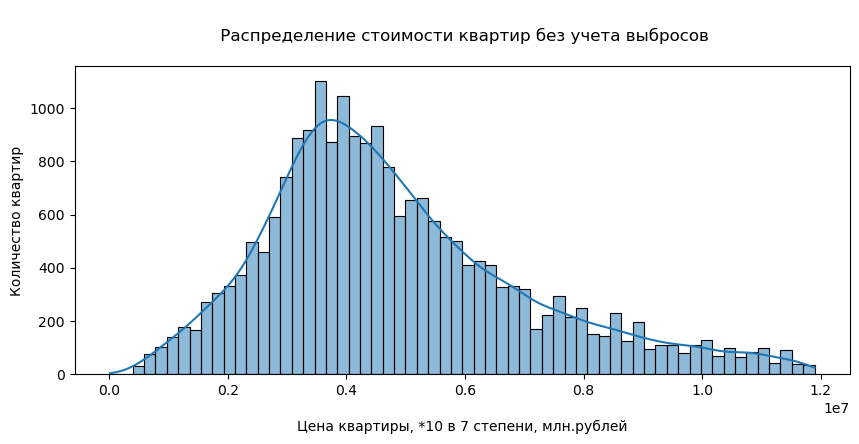

In [72]:
plt.figure(figsize=(10,4))

sns.histplot(data=dfq, x='last_price', kde=True)
plt.title('\n Распределение стоимости квартир без учета выбросов\n')
plt.ylabel('Количество квартир') #чтобы убрать автоматические метки для осей
plt.xlabel('\nЦена квартиры, *10 в 7 степени, млн.рублей')
plt.show()

<div style="border:solid green 2px; padding: 20px"> 

Вывод:
    
После удаления выбросов график выглядит как нормальное распределение. 

Большинство квартир в датасете имеют стоимость в районе 3 млн - 6 млн. 

У 50% квартир в выборке цена меньше, чем 4 650 000 млн. 

Не более 1% квартир имеют стоимость выше 36 000 000 млн. рублей.

### Общая площадь квартиры

Посмотрим на описательную статистику значений столбца `total_area_m2`.

In [73]:
df['total_area_m2'].describe()

count   23613.000
mean       60.341
std        35.649
min        12.000
25%        40.000
50%        52.000
75%        69.800
max       900.000
Name: total_area_m2, dtype: float64

Половина объектов имеют общую площадь не больше 52 м2. На среднее значение общей площади, которое составляет 60 м2, влияют выбросы. Например, есть объект с общей площадью в 900 м2.

Построим гистрограмму для площади квартир c помощью метода **hist()** библиотеки matplotlib. 

Уберем показ редких значений и посмотрим ближе распределение значений в диапазоне от 20 до 180.

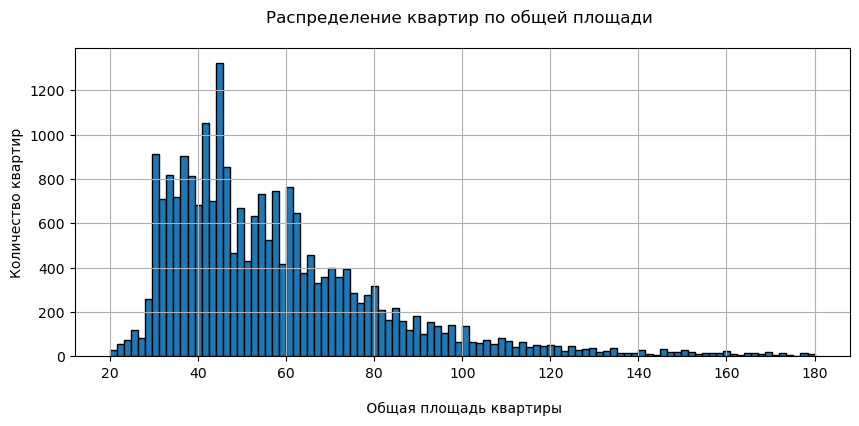

In [74]:
df.hist('total_area_m2', bins=100, range=(20,180), figsize=(10, 4), ec='black')
plt.title('Распределение квартир по общей площади \n')
plt.xlabel('\n Общая площадь квартиры')
plt.ylabel('Количество квартир')
plt.show();

<div style="border:solid green 2px; padding: 20px"> 

Вывод:

Мы убрали показ выбросов и хорошо видно, что чаще всего в датасете встречаются квартиры с площадью в диапазоне от 30 до 47 м2.

### Количество комнат

In [75]:
df['number_of_rooms'].describe()

count   23613.000
mean        2.071
std         1.078
min         0.000
25%         1.000
50%         2.000
75%         3.000
max        19.000
Name: number_of_rooms, dtype: float64

Построим гистограмму распределения количества комнат.

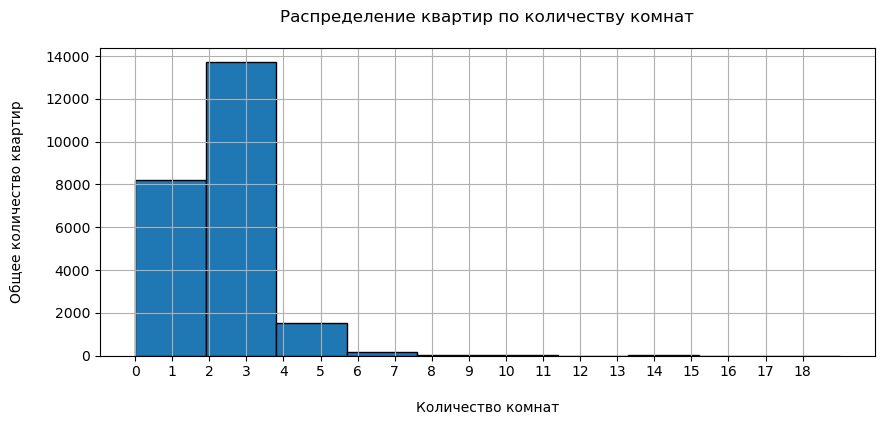

In [76]:
df['number_of_rooms'].hist(figsize=(10, 4),ec='black')
plt.xticks(np.arange(0, 19, step=1)) 
plt.title('Распределение квартир по количеству комнат\n')
plt.xlabel('\nКоличество комнат')
plt.ylabel('Общее количество квартир\n')
plt.show()

Поизучаем квартиры с количеством комнат 0.

In [77]:
print('Количество квартир с нулевым числом комнат: ', df.query('number_of_rooms == 0').shape[0])

Количество квартир с нулевым числом комнат:  194


Видимо, это квартиры-студии в большинстве случаев:

Посмотрим, сколько из них - квартиры-студии:

In [78]:
df.query('number_of_rooms == 0 and is_studio == True').shape[0]

135

In [79]:
f"Процент квартир с 0 количеством комнат: {df.query('number_of_rooms == 0').shape[0]/df.shape[0]:.2%}"

'Процент квартир с 0 количеством комнат: 0.82%'

In [80]:
f"Процент квартир с  количеством комнат 2: {df.query('number_of_rooms <=2').shape[0]/df.shape[0]:.2%}"

'Процент квартир с  количеством комнат 2: 68.28%'

<div style="border:solid green 2px; padding: 20px"> 

Вывод:
    
В нашем датасете больше всего одно-, двух- и трехкомнатных квартир. 

50 % квартир имеет не больше 2 комнат.  
    
0.8% квартир имеют нулевое количество комнат - в большинстве случаев это квартиры-студии.

###  Высота потолков

In [81]:
df['ceiling_height_m'].describe()

count   23613.000
mean        2.727
std         0.993
min         1.000
25%         2.550
50%         2.645
75%         2.750
max       100.000
Name: ceiling_height_m, dtype: float64

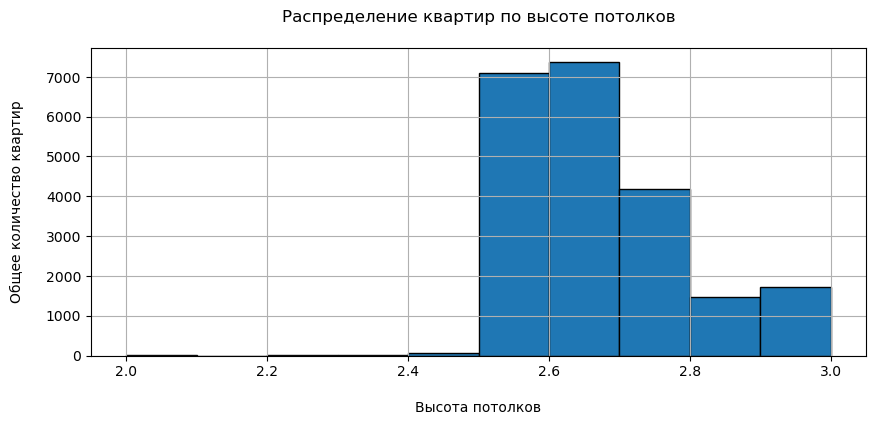

In [82]:
df['ceiling_height_m'].hist(range=(2,3), figsize=(10, 4), ec='black')
plt.title('Распределение квартир по высоте потолков\n')
plt.xlabel('\nВысота потолков')
plt.ylabel('Общее количество квартир\n')
plt.show()

<div style="border:solid green 2px; padding: 20px"> 

Вывод:
    
На гистограмме видно, что больше всего квартир у нас имеют высоту потолков в районе 2.5 - 2.7 метров.

### Длительность публикации объявления

Изучим значения в days_exposition

In [83]:
df['days_exposition'].describe()

count   20441.000
mean      180.885
std       219.686
min         1.000
25%        45.000
50%        95.000
75%       232.000
max      1580.000
Name: days_exposition, dtype: float64

Медиана (95) и среднее (180.9) существенно различаются.

Построим гистаграмму распределения длительности публикации объявления.

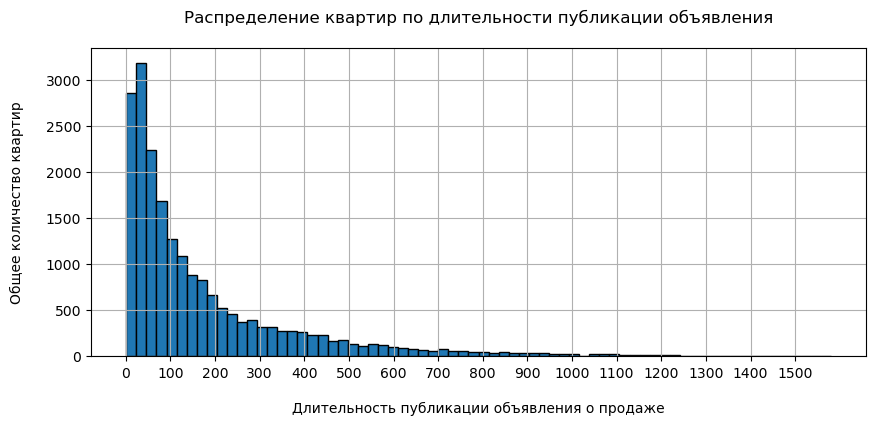

In [84]:
df['days_exposition'].hist(bins=70, figsize=(10, 4), ec='black')
plt.xticks(np.arange(0, 1600, step=100)) 
plt.title('Распределение квартир по длительности публикации объявления\n')
plt.xlabel('\nДлительность публикации объявления о продаже')
plt.ylabel('Общее количество квартир\n')
plt.show()

Имеем дело со скошенным распределением - все сгруппировано слева и есть длинный хвост из выбросов справа. Есть пик на отметке в 45-50 дней. Возможно, объявления спустя 50 дней снимаются автоматически сервисом Я.Недвижимости.

На гистрограмме мы видим, что чаще всего квартиры продаются за примерно 100 дней (3 месяца). Крайне редко продажа длится более 450 дней, более года. Это необычно долгие продажи.  

<div style="border:solid green 2px; padding: 20px"> 

Вывод:

Примерно в 50% случаев квартиры продаются не дольше, чем за 100 дней, то есть за примерно 3 месяца с небольшим. 

Четверть всех объявлений имеет длительность продажи больше 232 дней. 
    
Крайне редко объявления о продаже имеют длинную длительность от 460 дней до 1580 дней, то есть больше года.  

## Убираем редкие и выбивающиеся значения

Для определения аномалий и редкий значений в данных попробуем использовать в том числе теорию ящика с усами.

«Усы» простираются влево и вправо от границ ящика на расстояние, равное 1,5 межквартильного размаха (сокращённо IQR, от англ. interquartile range, «межквартильный размах»). В размах «усов» попадают нормальные значения, а за пределами находятся выбросы, изображённые точками.

Попробуем создать функцию, которая будет определять для каждого задаваемого нами признака - границы "усов". Эти границы и будут выбросами для данного признака.

In [85]:
"""
Функция на вход принимает имя датафрейма и имя столбца - изучаемый нами признак.
Возвращает границы левого и правого усов (список) на основе следующей логики:
Левый (или нижний) ус - это 4 квартиль минут полтора межквартильного разамаха,
а правый (или верхний ус) - это 3 квартиль плюс полтора межкартильного размаха.

"""
def get_whiskers(dataframe, column):
    q1 = df[column].quantile(0.25) # первый квантиль
    q3 = df[column].quantile(0.75) # третий квантиль
    minimum = df[column].min() # минимальное значение в наборе данных
    maximum = df[column].max() # максимальное значение в наборе данных

    # считаем межквартильный размах
    iqr = q3 - q1
    
    # считаем левый и правый ус, округляем значения    
    left_whisker = round(q1 - 1.5 * iqr, 2)
    right_whisker = round(q3 + 1.5 * iqr, 2)

    # левый ус не может быть меньше минимума:
    if left_whisker < minimum: left_whisker = minimum 
        
    # правый ус не может быть больше максимума:
    if right_whisker > maximum: right_whisker = maximum
        
    return [left_whisker, right_whisker]



### Общая площадь квартиры

In [86]:
df['total_area_m2'].describe()

count   23613.000
mean       60.341
std        35.649
min        12.000
25%        40.000
50%        52.000
75%        69.800
max       900.000
Name: total_area_m2, dtype: float64

Построим диаграмму размаха для площади квартиры

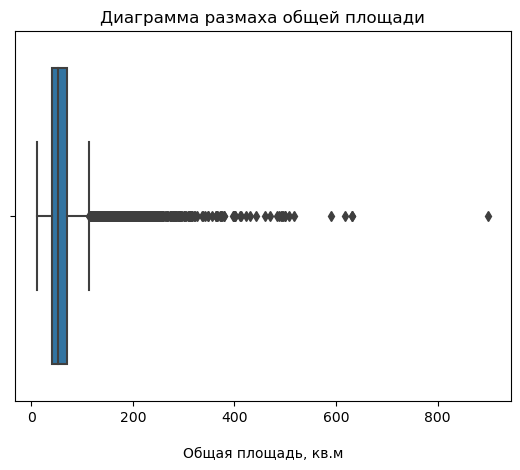

In [87]:
sns.boxplot(x=df['total_area_m2'])
plt.title('Диаграмма размаха общей площади')
plt.xlabel('\nОбщая площадь, кв.м')
plt.show()

In [88]:
#Протестируем нашу функцию:
get_whiskers(df, 'total_area_m2')

[12.0, 114.5]

У нас левый ус - это и есть наш минимум. Похоже, это квартира-студия. Квартиры с такой площадью существуют, поэтому мы не считаем это аномальными данными.
114.5 - это тоже не аномально большая площадь, если речь идет об элитном жилье или квартире с большим количеством комнат. Примерно после 350 плотность выбросов становится меньше. Возьмем отметку в 350 кв.м.

Создадим столбец со значениями True и False. Квартиры с очень большой площадью будут иметь True.

In [89]:
#Все квартиры, где площадь больше или равна 350, будем считать очень большими по площади.
df['is_too_large_area'] = df['total_area_m2']>= 350

Проверяем, что у нас получилось.

In [90]:
df['is_too_large_area'].value_counts()

False    23572
True        41
Name: is_too_large_area, dtype: int64

In [91]:
len(df[df['total_area_m2']>= 350])

41

In [92]:
df[df['total_area_m2']==900][['total_area_m2', 'is_too_large_area']]

,total_area_m2,is_too_large_area
19540,900.000,True


In [93]:
f"Выбивающиеся и редкие значения от всей выборки составляют {df.query('total_area_m2 >= 350').shape[0] / df.shape[0]:.1%} данных"

'Выбивающиеся и редкие значения от всей выборки составляют 0.2% данных'

### Cтоимость квартиры

In [94]:
df['last_price'].describe()

count       23613.000
mean      6540555.461
std      10901722.738
min         12190.000
25%       3400000.000
50%       4650000.000
75%       6799000.000
max     763000000.000
Name: last_price, dtype: float64

Посмтрим на границы усов для признака цена.

In [95]:
get_whiskers(df, 'last_price')

[12190.0, 11897500.0]

Квартира стоимостью 12190 смущает. Посмотрим на нее поближе.

In [96]:
df[df['last_price'] == 12190]

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_balconies,number_of_rooms,floor,floors_in_house,is_apartment,...,ponds_nearest_m,ponds_within_3000m,price_per_m2,weekday,month,year,floor_category,living_to_total_area_m2,kitchen_to_total_area_m2,is_too_large_area
8793,Санкт-Петербург,109.000,32.000,40.500,2.750,0,2,25,25,False,...,NaN,0.000,112.000,2,3,2019,последний этаж,0.294,0.372,False


Посмотрим на всю строку целиком.

In [97]:
df.loc[8793]

locality_name                   Санкт-Петербург
total_area_m2                           109.000
living_area_m2                           32.000
kitchen_area_m2                          40.500
ceiling_height_m                          2.750
number_of_balconies                           0
number_of_rooms                               2
floor                                        25
floors_in_house                              25
is_apartment                              False
is_studio                                 False
is_open_plan                              False
total_images                                  7
last_price                            12190.000
first_day_exposition        2019-03-20 00:00:00
days_exposition                           8.000
city_center_distance_m                 9176.000
airports_nearest_m                    36421.000
parks_nearest_m                         805.000
parks_within_3000m                        1.000
ponds_nearest_m                         

Это очень странная квартира: слишком маленькая цена, слишком маленькая жилая площадь при наличие двух комнат и подозрительное соотношение жилой площади к общей.  

Посмотрим еще гистограмму, определив интервал по нашим границам усов.

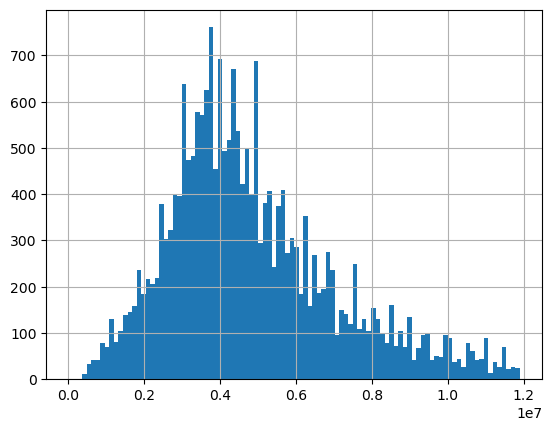

In [98]:
df['last_price'].hist(bins=100, range=(12190, 11897500));

Совсем мало значений на границе с 400 000. Проверим это c помощью условия в query

In [99]:
df.query('last_price<=400000')

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_balconies,number_of_rooms,floor,floors_in_house,is_apartment,...,ponds_nearest_m,ponds_within_3000m,price_per_m2,weekday,month,year,floor_category,living_to_total_area_m2,kitchen_to_total_area_m2,is_too_large_area
8793,Санкт-Петербург,109.000,32.000,40.500,2.750,0,2,25,25,False,...,NaN,0.000,112.000,2,3,2019,последний этаж,0.294,0.372,False


Найдем 99 персентиль. 

In [100]:
df['last_price'].quantile(0.99)

36000000.0

Лишь 1% в нашей выборке квартир имеет стоимость выше 36 000 000 - возьмем эту отметку в качестве верхней границы.

Проверяем еще раз, сколько данных в итоге отрезаем:

In [101]:
f"Выбивающиеся и редкие значения от всей выборки составляют {df.query('last_price >= 36000000 | last_price <= 400000').shape[0] / df.shape[0]:.1%} данных"


'Выбивающиеся и редкие значения от всей выборки составляют 1.0% данных'

Все квартиры, где стоимость больше или равне 36 млн или меньше 400 тыс будем маркировать признаком с необычной ценой.

In [102]:
df['is_unusual_price'] = (df['last_price']>= 36000000) | (df['last_price'] <= 400000)

Проверим, что получилось.

In [103]:
df.loc[8793][['last_price', 'is_unusual_price']]

last_price         12190.000
is_unusual_price        True
Name: 8793, dtype: object

In [104]:
df.loc[0][['last_price', 'is_unusual_price']]

last_price         13000000.000
is_unusual_price          False
Name: 0, dtype: object

In [105]:
df.query('last_price >= 36000000 | last_price <= 400000').shape[0]

240

In [106]:
df['is_unusual_price'].value_counts()

False    23373
True       240
Name: is_unusual_price, dtype: int64

Редкими наблюдениями будем считать квартиры, где стоимость больше или равне 36 млн или меньше 400 тыс.

### Количество комнат

In [107]:
df['number_of_rooms'].describe()

count   23613.000
mean        2.071
std         1.078
min         0.000
25%         1.000
50%         2.000
75%         3.000
max        19.000
Name: number_of_rooms, dtype: float64

Cтроим ящик с усами для признака "количество комнат".

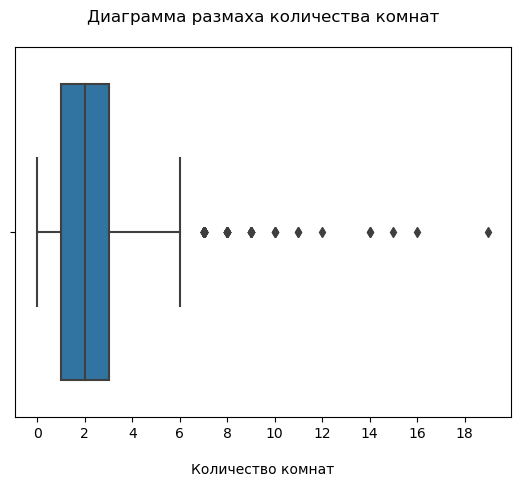

In [108]:
sns.boxplot(x= df['number_of_rooms'])
plt.title('Диаграмма размаха количества комнат\n')
plt.xlabel('\nКоличество комнат')
plt.xticks(np.arange(0, 19, step=2)) 
plt.show();

На ящике видны выбросы за пределами верхнего (правого) уса. Проверим границы усов с помощью нашей функции get_whiskers.

In [109]:
get_whiskers(df, 'number_of_rooms')

[0, 6.0]

Запишем в новый столбец информацию о квартирах с очень большим количеством комнат.

In [110]:
df['is_too_many_rooms'] = (df['number_of_rooms'] >= 6)

Редкими наблюдениями в столбце с количеством комнат будем считать объекты недвижимости с количеством комнат больше 6.

In [111]:
f"Выбивающиеся и редкие значения от всей выборки составляют {df.query('number_of_rooms >= 6').shape[0] / df.shape[0]:.1%} данных"

'Выбивающиеся и редкие значения от всей выборки составляют 0.8% данных'

Проверим, что получилось.

In [112]:
df['is_too_many_rooms'].value_counts()

False    23419
True       194
Name: is_too_many_rooms, dtype: int64

In [113]:
df.query('number_of_rooms >= 6').shape[0]

194

### Высота потолков

In [114]:
df['ceiling_height_m'].describe()

count   23613.000
mean        2.727
std         0.993
min         1.000
25%         2.550
50%         2.645
75%         2.750
max       100.000
Name: ceiling_height_m, dtype: float64

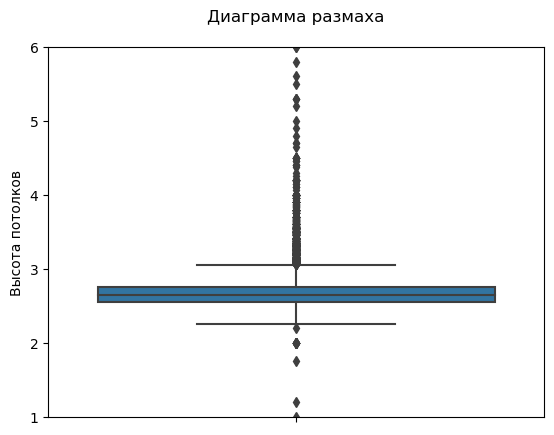

In [115]:
sns.boxplot(data = df, y = 'ceiling_height_m')
plt.ylim(1, 6)
plt.title('Диаграмма размаха\n')
plt.ylabel('Высота потолков')
plt.show();

Посмотрим на значения границ усов.

In [116]:
get_whiskers(df, 'ceiling_height_m')

[2.25, 3.05]

Выбросы после 3 все-таки довольно плотные. Для элитных домов высота потолков в 4 метра не является редким значением.  

In [117]:
f"Выбивающиеся и редкие значения от всей выборки составляют {df.query('ceiling_height_m <= 2.25 | ceiling_height_m >= 4').shape[0] / df.shape[0]:.1%} данных"

'Выбивающиеся и редкие значения от всей выборки составляют 0.6% данных'

Все квартиры, где высота потолков больше или равна 4 кв. м. или меньше 2.25 будем маркировать признаком unusual_ceiling.

In [118]:
df['is_unusual_ceiling'] = (df['ceiling_height_m']>= 4) | (df['ceiling_height_m'] <= 2.25)

Проверяем, что у нас получилось.

In [119]:
len(df[(df['ceiling_height_m']>= 4) | (df['ceiling_height_m'] <= 2.25)])

134

In [120]:
df['is_unusual_ceiling'].value_counts()

False    23479
True       134
Name: is_unusual_ceiling, dtype: int64

In [121]:
df.loc[22590][['ceiling_height_m', 'is_unusual_ceiling']]

ceiling_height_m     1.000
is_unusual_ceiling    True
Name: 22590, dtype: object

### Время продажи

In [122]:
df['days_exposition'].describe()

count   20441.000
mean      180.885
std       219.686
min         1.000
25%        45.000
50%        95.000
75%       232.000
max      1580.000
Name: days_exposition, dtype: float64

In [123]:
#Cмотрим на границы усов
get_whiskers(df, 'days_exposition')

[1.0, 512.5]

Посмотрим на ящик с усами.

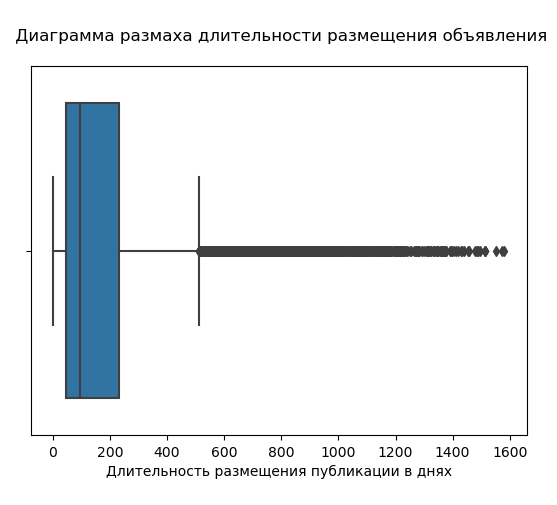

In [124]:
sns.boxplot(x = df['days_exposition'])
plt.title('\n Диаграмма размаха длительности размещения объявления\n')
plt.xlabel('Длительность размещения публикации в днях\n')
plt.show()

Посмотрим, сколько процентов от выборки составляют квартиры, проданные за 1 день.

In [125]:
f"Процент квартир, проданных за 1 день: {len(df.query('days_exposition <= 9'))/len(df):.1%}"

'Процент квартир, проданных за 1 день: 4.8%'

Необычно короткой продажей будем считать продажи за 1 день, необычно длинные - продажи, которые шли более 512 дней.

In [126]:
#Cохраним в отдельный столбец признак необычно долгой или короткой публикации:
df['is_unusual_days_expos'] = (df['days_exposition'] == 1) | (df['days_exposition'] >= 512)

Проверим, что получилось.

In [127]:
df['is_unusual_days_expos'].value_counts()

False    21945
True      1668
Name: is_unusual_days_expos, dtype: int64

In [128]:
len(df[(df['days_exposition'] == 1) | (df['days_exposition'] >= 512)])

1668

In [129]:
df.loc[2][['days_exposition', 'is_unusual_days_expos']]

days_exposition         558.000
is_unusual_days_expos      True
Name: 2, dtype: object

In [130]:
f"Выбивающиеся и редкие значения от всей выборки составляют {df.query('days_exposition ==1 | days_exposition >= 512').shape[0] / df.shape[0]:.1%} данных"

'Выбивающиеся и редкие значения от всей выборки составляют 7.1% данных'

### Вывод

<div style="border:solid green 2px; padding: 20px"> 

Мы попытались определить редкие и выбивающиеся значения для следующих признаков: общая площадь объекта недвижимости, стоимость, число комнат, высота потолков.

* Аномально большой по общей площади объект недвижимости имеет площадь 900 м.кв. Объекты с площадью в 350 м.кв. и больше считаются редкими и составляют 0.17% от всей выборки.

* Аномально дорогой объект недвижимости имеет стоимость 763 000 000 млн. рублей. Аномально дешевый объект недвижимости имеет стоимость в 12 190 рублей.
 В целом объекты недвижимости дороже 36 000 000 млн рублей и дешевле 400 000 тыс рублей составляют 1 % от выборки. 

* Аномально редкое количество комнат - 19. В целом объекты с количеством комнат больше 6 встречаются редко, их процент составляет 0.8% от всей выборки. 

* Аномально низкий потолок - 1 метр. Аномально высокий - 100 метров. Объекты недвижимости с высотой потолка больше или равной 4 кв.м или меньше 2.25 считаются редкими и составляют 0.6 % от всей выборки.

* Аномально короткий срок длительности публикации о продаже недвижимости - 1 день. Аномально длинный - 1580 дней (4 года 4 месяца). 
Объекты недвижимости, срок длительности публикации у которых равен 1 дню или больше или равен 512 дням (1 год 5 месяцев), считаются редкими и выбивающимися. Такие случаи составляют 7.1% от всей выборки.




## Определяем, какие факторы больше всего влияют на стоимость квартиры. 

Изучим, зависит ли цена от площади, количества комнат, удалённости от центра. 

Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом, а также влияют ли даты размещения: день недели, месяц и год.

Для начала мы уберем редкие и выбивающиеся значений - отфильтруем наши данные, потому что коэффициент Пирсона к выбросам очень чувствительный:

Фильтруем данные без выбросов в отдельный датафрейм.

In [131]:
clean_df = df[(df['is_too_large_area'] == False) & 
     (df['is_unusual_price'] == False) &
     (df['is_too_many_rooms'] == False) &
     (df['is_unusual_ceiling'] == False) &
     (df['is_unusual_days_expos'] == False)].reset_index(drop=True)
    

f'Доля чистых значений составила: {len(clean_df) / len(df):.1%}'

'Доля чистых значений составила: 91.1%'

То есть мы отрезали примерно 9 % данных. Это допустимо. 

Посмотрим на коэффициент корреляции Пирсона для таких признаков, как общая площадь квартиры, жилая площадь квартиры, количество комнат, удаленность от центра, высота потолков.

In [132]:
#Построим матрицу корреляции:
cols = ['total_area_m2', 'living_area_m2', 'ceiling_height_m', 'number_of_rooms', 'last_price', 'city_center_distance_m']
(clean_df[cols].corr()
.style
.format("{:.1f}")
.background_gradient(cmap='Blues'))

,total_area_m2,living_area_m2,ceiling_height_m,number_of_rooms,last_price,city_center_distance_m
total_area_m2,1.0,0.9,0.4,0.8,0.8,-0.2
living_area_m2,0.9,1.0,0.4,0.9,0.6,-0.2
ceiling_height_m,0.4,0.4,1.0,0.2,0.5,-0.3
number_of_rooms,0.8,0.9,0.2,1.0,0.5,-0.1
last_price,0.8,0.6,0.5,0.5,1.0,-0.3
city_center_distance_m,-0.2,-0.2,-0.3,-0.1,-0.3,1.0


Близкий к 1 коэффициент только у пары 'стоимость-общая площадь' (тут сильная корреляция, коэффициент Пиросна равен 0.8), чуть слабее корреляция у пары 'стоимость - жилая площадь (0.6)". Корреляция в 0.5 у пары 'стоимость-количество комнат' говорит о наличии связи, однако слабой. То же самое можно сказать и о паре "стоимость - высота потолков".

Нарисуем диаграмму рассеяния для цены и общей площади, чтобы визуализировать взаимосвязь.

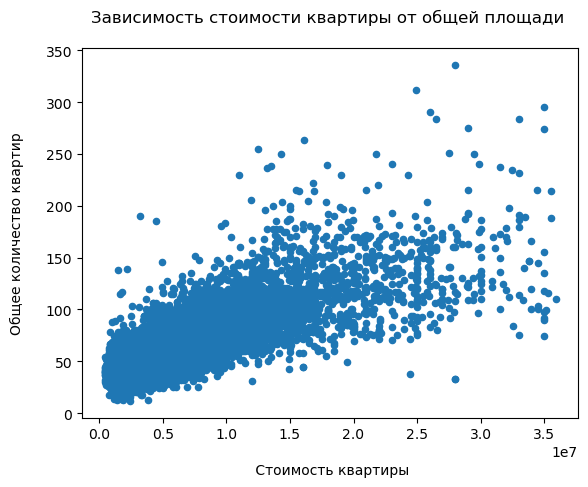

In [133]:
clean_df.plot(x='last_price',y='total_area_m2',kind='scatter') 
plt.title('Зависимость стоимости квартиры от общей площади \n')
plt.xlabel('\n Стоимость квартиры')
plt.ylabel('Общее количество квартир\n')
plt.show();

<div style="border:solid green 2px; padding: 20px">  
    
#### Взаимосвязь между стоимостью и общей площадью. Промежуточный вывод: 

Коэффициент Пирсона равен 0.8. Это высокая корреляция. Видно, что линейная положительная связь есть, то есть **чем больше площадь, тем дороже объект недвижимости**.

Для значений столбцов с днями недели, месяцами, годами и категорией этажа нет смысла смотреть на коэффициент корреляции Пирсона. Это дискретные величины и к ним он не применим. 

Создадим функцию для построения сводной таблицы по интересующему нас признаку и для отрисовки графика.

In [134]:
"""
Данная функция берет на вход два строковых значения: признак (feature), то есть имя столбца в датасете, по которому мы будем группировать данные, и 
название этого признака на русском языке (feature_name) для корректных подписей на графике. 
В теле функции мы строим сводную таблицу по данному признаку, вычисляем медиану стоимость квартиры в каждой группе и выводим сводную таблицу на экран,
а также по этой сводной таблице мы строим график и выводим его на экран.

"""

def get_pivot_and_plot(feature, feature_name):
    pivot_table = clean_df.groupby(feature)['last_price'].agg(['median'])
    display(pivot_table.sort_values(by='median').style.format("{:.1f}").background_gradient(cmap='Blues'))
    pivot_table.plot()
    plt.title(f'\n Зависимость стоимости квартиры от признака "{feature_name}"\n')
    plt.ylabel('Стоимость квартиры')
    plt.xlabel(f'\n{feature_name}')
    plt.show();

Посмотрим, как меняется стоимость квартиры в зависимости от категории этажа.

,median
floor_category,
первый этаж,3850000.0
последний этаж,4200000.0
другой,4750000.0


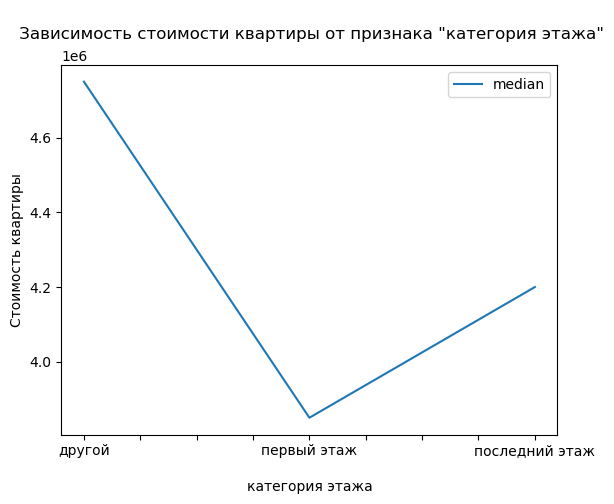

In [135]:
get_pivot_and_plot('floor_category', 'категория этажа')

<div style="border:solid green 2px; padding: 20px">  

#### Взаимосвязь между стоимостью и этажом. Промежуточный вывод: 

Самая низкая стоимость у объектов, которые находятся на первом этаже. 

Самая высокая - у объектов, которые находятся не на первом и не на последнем этаже.

Посмотрим, как зависимость между публикацией объявления о продаже квартиры и стоимостью квартиры.

Напомним, что 0 - это понедельник. 

,median
weekday,
4,4500000.0
5,4500000.0
6,4500000.0
3,4520000.0
0,4600000.0
1,4600000.0
2,4600000.0


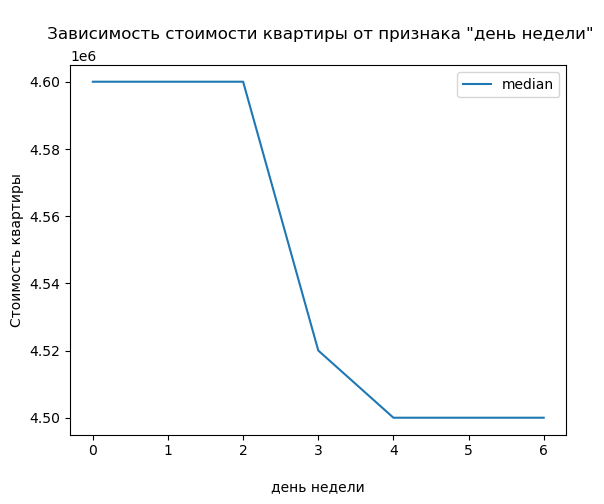

In [136]:
get_pivot_and_plot('weekday', 'день недели')

<div style="border:solid green 2px; padding: 20px"> 

#### Взаимосвязь между днем недели публикации объявления. Промежуточный вывод: 
Самая высокая стоимость у квартир, объявления о продаже которых опубликовано в понедельник, вторник и среду. 

Стоимость квартир, опубликованных в четверг, резко падает, и квартиры, опубликованные в пятницу, субботу и воскресенье имеют примерно одинаковую стоимость. 

Посмотрим, как меняется стоимость квартиры в зависимости от месяца публикации.

,median
month,
6,4300000.0
5,4450000.0
1,4500000.0
8,4500000.0
10,4500000.0
7,4550000.0
12,4550000.0
2,4600000.0
3,4600000.0


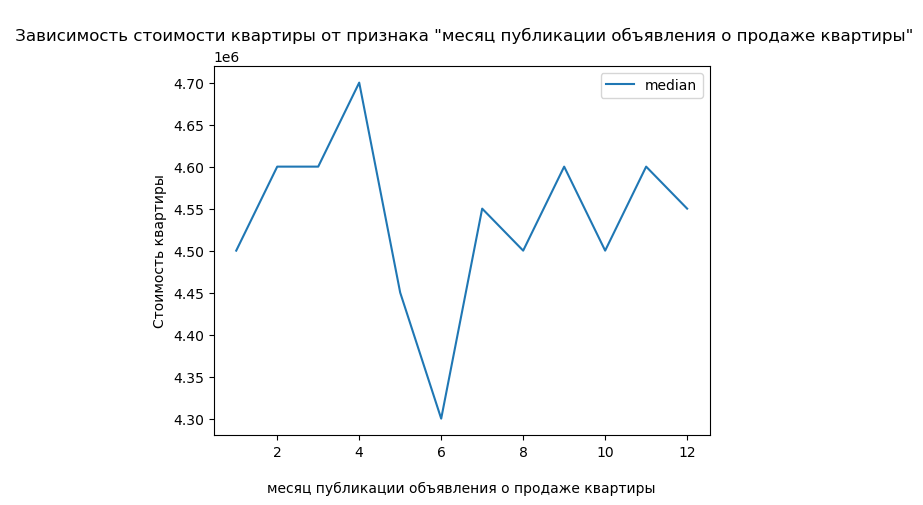

In [137]:
get_pivot_and_plot('month', 'месяц публикации объявления о продаже квартиры')

<div style="border:solid green 2px; padding: 20px"> 

#### Взаимосвязь между месяцем публикации объявления. Промежуточный вывод: 

У объектов, объявление о продаже которых опубликовано c января по апрель, стоимость растет и достигает пика в апреле. В мае отмечается резкое падение цены, которое достигает дна в июне. Дальше происходит постепенный рост со спадами. 

Посмотрим, как меняется стоимость квартиры в зависимости от года публикации.

,median
year,
2016,4450000.0
2017,4450000.0
2018,4500000.0
2015,4980000.0
2019,5000000.0
2014,17250000.0


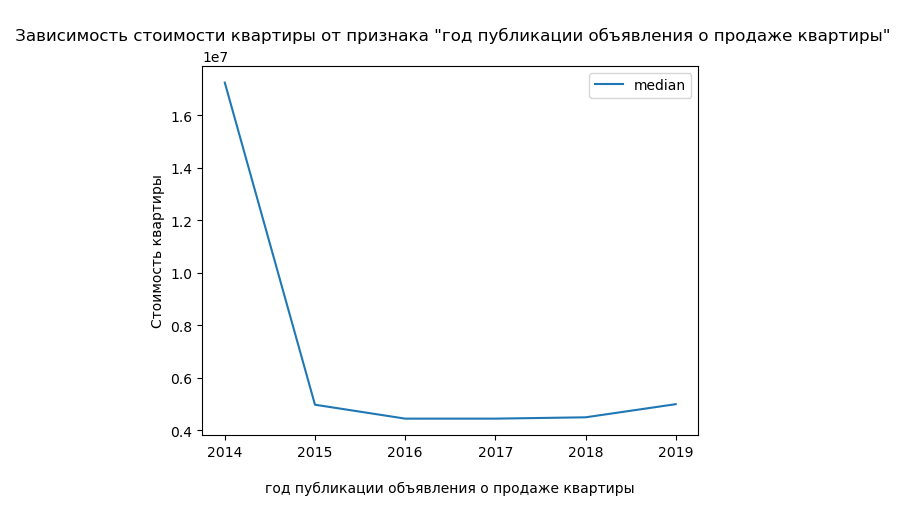

In [138]:
get_pivot_and_plot('year', 'год публикации объявления о продаже квартиры')

<div style="border:solid green 2px; padding: 20px"> 

#### Взаимосвязь между годом публикации объявления. Промежуточный вывод: 
В 2014 году цена была самой высокой и падала до 2016 года. С 2016 по 2018 была примерно на одном и том же уровне и с 2018 немного подроcла, почти достигнув уровня 2015 года.

## Десять населённых пунктов с наибольшим числом объявлений.

Сгруппируем наши данные по названию населенного пункта, посчитаем среднюю цену квадратного метра, покажем топ-10 населенных пунктов по количеству объявлений.

In [139]:
locality_groupped = df.groupby('locality_name')['price_per_m2'].agg(['count', 'mean']).sort_values(by=['count'], ascending=False)
locality_groupped.head(10).style.format("{:.1f}").background_gradient(cmap='Blues')

,count,mean
locality_name,,
Санкт-Петербург,15651.0,114868.9
поселок Мурино,552.0,85629.6
поселок Шушары,439.0,78551.4
Всеволожск,398.0,68654.5
Пушкин,369.0,103125.8
Колпино,338.0,75424.6
поселок Парголово,327.0,90175.9
Гатчина,307.0,68746.1
деревня Кудрово,299.0,92473.6


Построим столбчатую диаграмму, которая покажет десятку городов, где самая высокая цена за 1 кв.м.

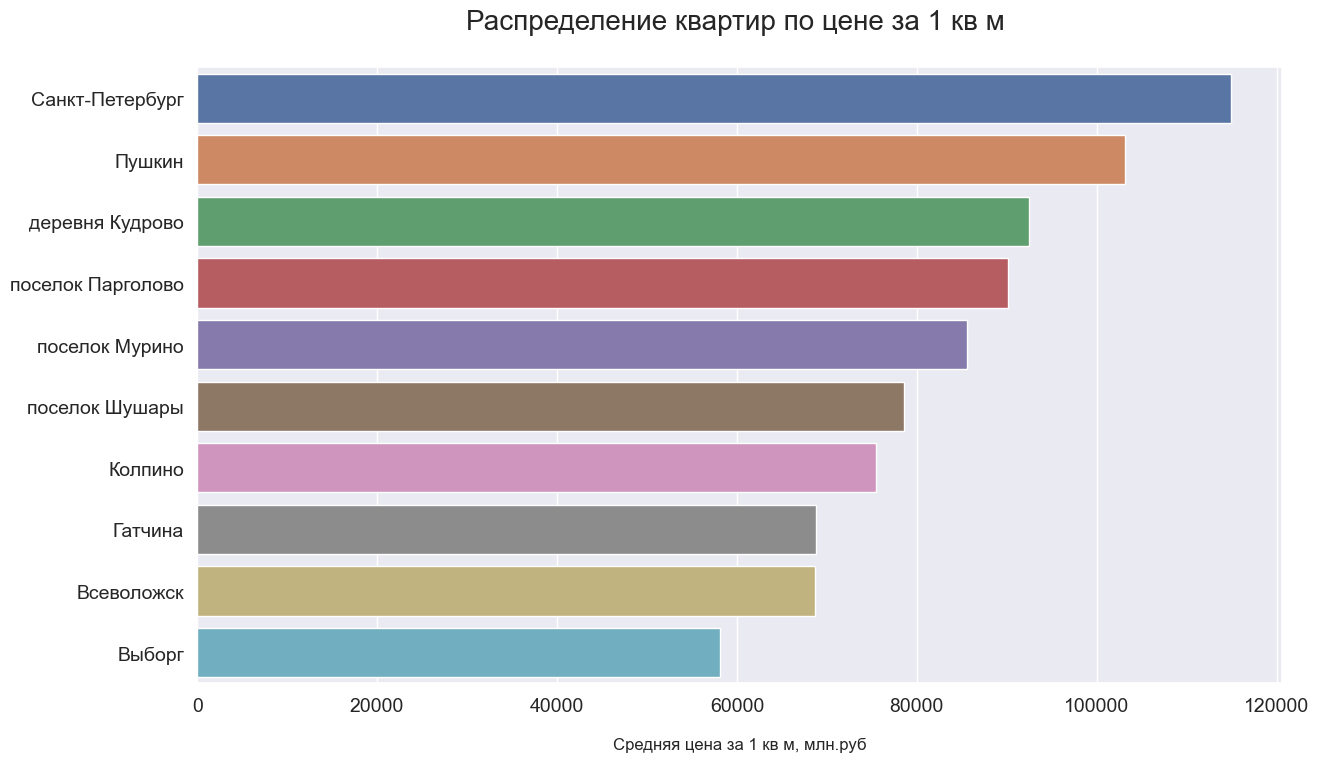

In [140]:
plt.figure(figsize=(14,8))
sns.set_palette('pastel')
sns.set_theme(style="darkgrid")
sns.barplot(x='mean', y='locality_name', orient='h', data=locality_groupped.head(10).sort_values(by='mean', ascending=False).drop(columns=['count']).reset_index())
plt.title('Распределение квартир по цене за 1 кв м \n',fontsize=20)
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xlabel('\nСредняя цена за 1 кв м, млн.руб\n')
plt.xticks(fontsize=14)
plt.show();

Посмотрим, сколько всего населенных пунктов в нашем датафрейме (помним, что есть и unknown).

In [141]:
f'Всего населенных пунктов в датафрейме: {locality_groupped.shape[0]}.'

'Всего населенных пунктов в датафрейме: 331.'

### Вывод

<div style="border:solid green 2px; padding: 20px"> 

* Всего в нашем датафрейме не меньше 331 населенных пунктов.
    
* Лидер с наибольшим числом объявлений - город Санкт-Петербург. 
    
* Самое дорогое жилье в 10-ке лидеров по количеству объявлений - в Санкт-Петербурге (средняя стоимость за 1 кв. м составляет 114 868 руб.), а самое дешевое - в Выборге (средняя стоимость за 1 кв.м. составляет - 58 141 рублей).

## 5. Исследование квартир Санкт-Петербурга

Выделим квартиры в Санкт-Петербурге. 
Наша первая задача — выяснить, какая область входит в центр. 

Столбец city_center_distance_m — это расстояние до центра города в метрах. Для удобства создадим столбец с расстоянием до центра в километрах, окргулим до целых значений. 


In [142]:
df.columns

Index(['locality_name', 'total_area_m2', 'living_area_m2', 'kitchen_area_m2',
       'ceiling_height_m', 'number_of_balconies', 'number_of_rooms', 'floor',
       'floors_in_house', 'is_apartment', 'is_studio', 'is_open_plan',
       'total_images', 'last_price', 'first_day_exposition', 'days_exposition',
       'city_center_distance_m', 'airports_nearest_m', 'parks_nearest_m',
       'parks_within_3000m', 'ponds_nearest_m', 'ponds_within_3000m',
       'price_per_m2', 'weekday', 'month', 'year', 'floor_category',
       'living_to_total_area_m2', 'kitchen_to_total_area_m2',
       'is_too_large_area', 'is_unusual_price', 'is_too_many_rooms',
       'is_unusual_ceiling', 'is_unusual_days_expos'],
      dtype='object')

In [143]:
df['city_center_distance_km'] = round(df['city_center_distance_m'] / 1000, 0)
df['city_center_distance_km']

0       16.000
1       19.000
2       14.000
3        7.000
4        8.000
         ...  
23694    4.000
23695      NaN
23696      NaN
23697   10.000
23698      NaN
Name: city_center_distance_km, Length: 23613, dtype: float64

Теперь сделаем срез данных для квартир в Санкт-Петербурге: уберем редкие, выбивающиеся значения, строки с пустым значением в city_center_distance_km.

In [144]:
#Фильтруем данные без выбросов для Санкт-Петербурга в отдельный датафрейм:
clean_df_spb = df[(df['is_too_large_area'] == False) & 
     (df['is_unusual_price'] == False) &
     (df['is_too_many_rooms'] == False) &
     (df['is_unusual_ceiling'] == False) &
     (df['is_unusual_days_expos'] == False) &
     (df['locality_name'] == 'Санкт-Петербург') &
     (df['city_center_distance_km'].notnull())].reset_index(drop=True)
    
print('Доля чистых значений составила: {:.1%}'. format(len(clean_df_spb) / len(df)))

Доля чистых значений составила: 59.5%


Проверим, верно ли отфильтровались квартиры по населенному пункту.

In [145]:
clean_df_spb['locality_name'].value_counts()

Санкт-Петербург    14049
Name: locality_name, dtype: int64

Все в порядке.

Сгруппируем данные по расстоянию до центра, посчитаем среднюю цену для каждого километра

In [146]:
df.columns

Index(['locality_name', 'total_area_m2', 'living_area_m2', 'kitchen_area_m2',
       'ceiling_height_m', 'number_of_balconies', 'number_of_rooms', 'floor',
       'floors_in_house', 'is_apartment', 'is_studio', 'is_open_plan',
       'total_images', 'last_price', 'first_day_exposition', 'days_exposition',
       'city_center_distance_m', 'airports_nearest_m', 'parks_nearest_m',
       'parks_within_3000m', 'ponds_nearest_m', 'ponds_within_3000m',
       'price_per_m2', 'weekday', 'month', 'year', 'floor_category',
       'living_to_total_area_m2', 'kitchen_to_total_area_m2',
       'is_too_large_area', 'is_unusual_price', 'is_too_many_rooms',
       'is_unusual_ceiling', 'is_unusual_days_expos',
       'city_center_distance_km'],
      dtype='object')

In [147]:
spb_center_nearest = clean_df_spb.groupby('city_center_distance_km')['price_per_m2'].agg('mean')
spb_center_nearest

city_center_distance_km
0.000    142906.400
1.000    148389.798
2.000    129977.187
3.000    119336.152
4.000    127490.812
5.000    133618.191
6.000    134613.803
7.000    134848.961
8.000    123310.554
9.000    113668.024
10.000   112343.717
11.000   107718.563
12.000   107832.009
13.000   108547.424
14.000   104536.326
15.000   104297.043
16.000   100584.314
17.000    97591.770
18.000    96531.374
19.000    99093.439
20.000   103103.911
21.000    94201.582
22.000    91891.568
23.000    92258.272
24.000    84566.640
25.000    91531.346
26.000    87798.860
27.000   132115.500
28.000    81161.857
29.000    66418.500
Name: price_per_m2, dtype: float64

Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

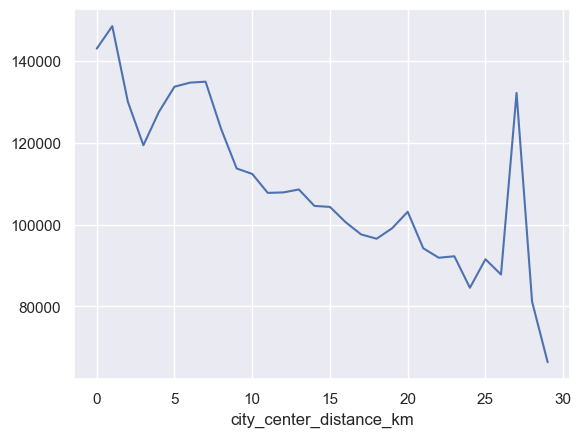

In [148]:
#Cтроим простенький плот - его нам достаточно, чтобы увидеть границу.
spb_center_nearest.plot();

Пик цены около 1 км, дальше цена резко падает, после 4 км снова растет и после 8 километра устойчивая тенденция к понижению. Будем считать 8 километр - границей центральной зоны.
На 27 есть всплеск роста (наверное, это некоторые выбивающиеся данные или, возможно, что-то еще очень сильно повлияло на рост цены). 

1. Теперь выделим сегмент квартир в центре Санкт-Петербурга. 

2. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. 

3. Определим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

4. Сделаем вывод отличаются ли они от общих выводов по городу.

Выделяем сегмент квартир в центре Санкт-Петербурга.

In [149]:
spb_center = clean_df_spb[clean_df_spb['city_center_distance_km'] <= 8]
spb_center.head()

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_balconies,number_of_rooms,floor,floors_in_house,is_apartment,...,year,floor_category,living_to_total_area_m2,kitchen_to_total_area_m2,is_too_large_area,is_unusual_price,is_too_many_rooms,is_unusual_ceiling,is_unusual_days_expos,city_center_distance_km
1,Санкт-Петербург,100.000,32.000,41.000,3.030,0,2,13,14,False,...,2018,другой,0.320,0.410,False,False,False,False,False,8.000
10,Санкт-Петербург,97.200,46.500,19.600,2.685,0,2,1,3,False,...,2015,первый этаж,0.478,0.202,False,False,False,False,False,2.000
31,Санкт-Петербург,118.000,68.000,16.000,3.000,0,3,7,9,False,...,2018,другой,0.576,0.136,False,False,False,False,False,5.000
33,Санкт-Петербург,30.000,16.000,7.000,2.650,0,1,1,5,False,...,2018,первый этаж,0.533,0.233,False,False,False,False,False,8.000
41,Санкт-Петербург,29.500,15.600,5.500,2.500,1,1,2,5,False,...,2019,другой,0.529,0.186,False,False,False,False,False,7.000


### Анализ и сравнение площади, цены, числа комнат, высоты потолков в центре Санкт-Петербурга и для всего города.

Выведем описательную статистику для данных по центру Санкт-Петербурга и всему городу.

In [150]:
cols = (['total_area_m2', 'last_price', 'number_of_rooms', 'ceiling_height_m'])
for col_name in cols:
    print(f'{col_name} для центра Санкт-Петербурга:', '\n')
    print(spb_center[col_name].describe(), '\n')
    print(f'{col_name} для всего Санкт-Петербурга:', '\n')
    print(clean_df_spb[col_name].describe(), '\n')
    

total_area_m2 для центра Санкт-Петербурга: 

count   3295.000
mean      77.689
std       35.241
min       12.000
25%       52.000
50%       71.500
75%       95.300
max      295.000
Name: total_area_m2, dtype: float64 

total_area_m2 для всего Санкт-Петербурга: 

count   14049.000
mean       60.056
std        27.930
min        12.000
25%        41.000
50%        53.360
75%        71.100
max       336.000
Name: total_area_m2, dtype: float64 

last_price для центра Санкт-Петербурга: 

count       3295.000
mean    10076822.524
std      5995482.743
min      1600000.000
25%      6100000.000
50%      8300000.000
75%     12000000.000
max     35900000.000
Name: last_price, dtype: float64 

last_price для всего Санкт-Петербурга: 

count      14049.000
mean     6770667.829
std      4364963.328
min      1190000.000
25%      4150000.000
50%      5390000.000
75%      7650000.000
max     35900000.000
Name: last_price, dtype: float64 

number_of_rooms для центра Санкт-Петербурга: 

count   3295.000
me

Построим столбчатые диаграммы по каждому признаку с помощью библиотеки seaborn. Для наглядности сравнения построим данные для центра Санкт-Петербурга и остальных районов города на одном графике. Нормируем показатели через параметр stat="density".     

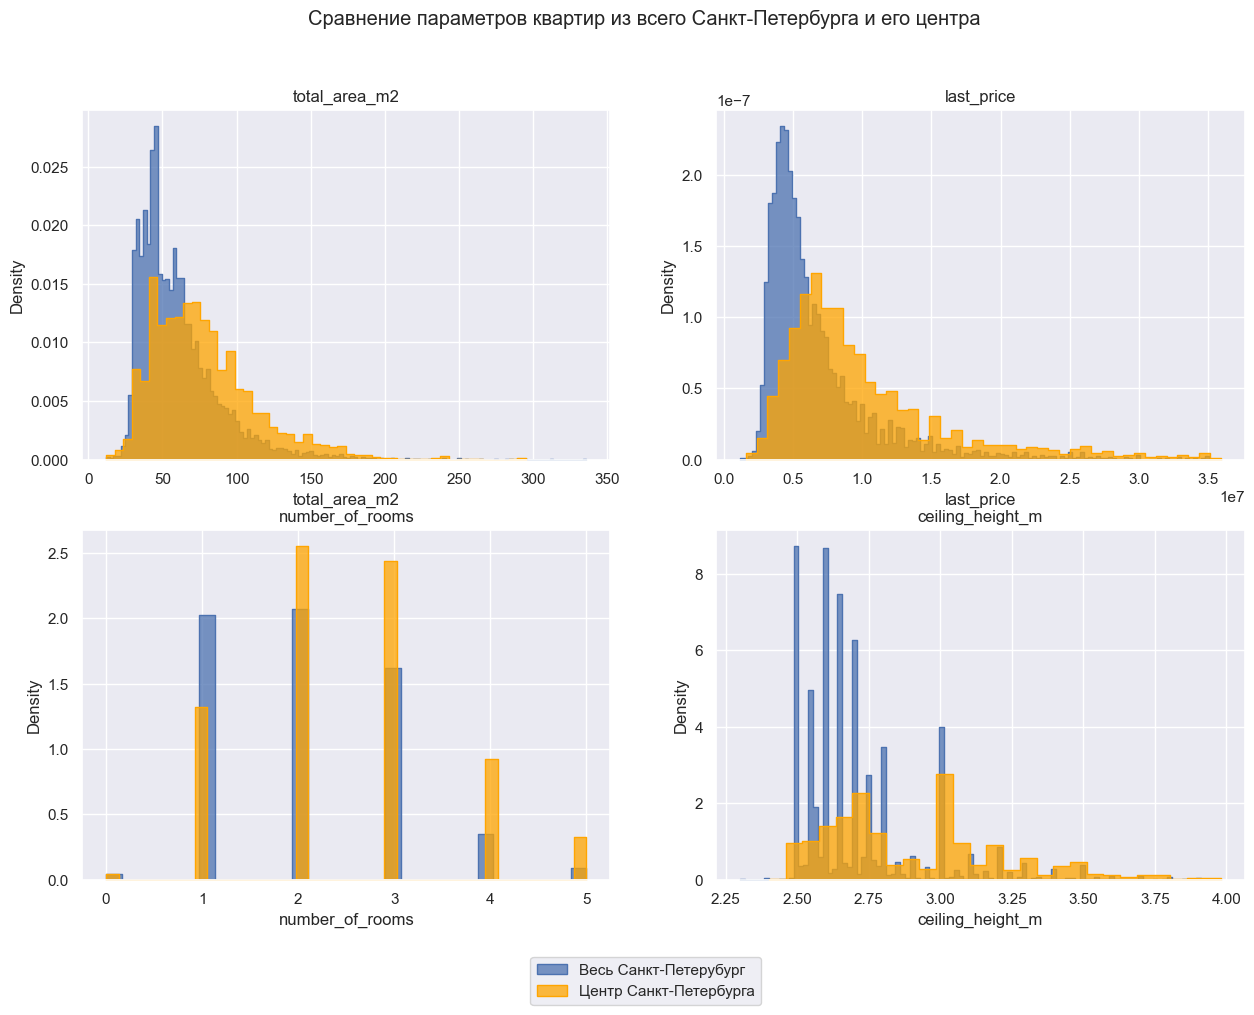

In [151]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(['total_area_m2', 'last_price', 'number_of_rooms', 'ceiling_height_m']):

    plt.subplot(2, 2, i+1)
    sns.histplot(
        clean_df_spb, x=col, element="step",
        stat="density", 
        ).set(title=col)
    sns.histplot(
        spb_center, x=col, element="step",
        stat="density",
        color='orange'
        )
    
plt.legend(['Весь Санкт-Петерубург','Центр Санкт-Петербурга'], loc = 'upper right', bbox_to_anchor=(0.1, -.2))
plt.suptitle('Сравнение параметров квартир из всего Санкт-Петербурга и его центра')
plt.show()

#### Вывод 

<div style="border:solid green 2px; padding: 20px"> 

* Цена и общая площадь у квартир в центре Санкт-Петербурга в среднем выше, чем по всему городу. 

* В центре гораздо больше квартир с большим числом комнат (от 4 и до 6). Для всего города этот процент существенно ниже.
    
То же самое можно сказать и о двушках и трешках. Их почти равное количество в центре города. В то время как во всем городе больше половины квартир - это двушки. 

* Высота потолков в квартирах в центре в среднем выше, чем по всему городу.

### Анализ факторов, влияющих на стоимость квартиры в центре Санкт-Петербурга и для всего города.

Выделим факторы, которые влияют на стоимость квартиры в центре города (число комнат, этаж, удалённость от центра, дата размещения объявления, общая площадь). 

In [152]:
#Построим матрицу корреляции для центра Санкт-Петербурга:
cols = ['last_price', 'total_area_m2', 'number_of_rooms', 'city_center_distance_m', 'ceiling_height_m', 'living_area_m2','floor']
print ('\n Матрица корреляции для центра Санкт-Петербурга: \n')
(spb_center[cols].corr()
.style
.format("{:.1f}")
.background_gradient(cmap='Blues'))


 Матрица корреляции для центра Санкт-Петербурга: 



,last_price,total_area_m2,number_of_rooms,city_center_distance_m,ceiling_height_m,living_area_m2,floor
last_price,1.0,0.7,0.4,-0.1,0.3,0.6,0.2
total_area_m2,0.7,1.0,0.8,-0.2,0.3,0.9,0.1
number_of_rooms,0.4,0.8,1.0,-0.2,0.3,0.8,-0.1
city_center_distance_m,-0.1,-0.2,-0.2,1.0,-0.3,-0.2,0.3
ceiling_height_m,0.3,0.3,0.3,-0.3,1.0,0.4,-0.2
living_area_m2,0.6,0.9,0.8,-0.2,0.4,1.0,-0.0
floor,0.2,0.1,-0.1,0.3,-0.2,-0.0,1.0


In [153]:
spb_center[cols].corr()['last_price']

last_price                1.000
total_area_m2             0.735
number_of_rooms           0.441
city_center_distance_m   -0.093
ceiling_height_m          0.254
living_area_m2            0.580
floor                     0.183
Name: last_price, dtype: float64

Посмотрим матрицу для всего города.

In [154]:
print ('\n Матрица корреляции для всего Санкт-Петербурга:\n')
(clean_df_spb[cols].corr()
.style
.format("{:.1f}")
.background_gradient(cmap='Blues'))


 Матрица корреляции для всего Санкт-Петербурга:



,last_price,total_area_m2,number_of_rooms,city_center_distance_m,ceiling_height_m,living_area_m2,floor
last_price,1.0,0.8,0.5,-0.4,0.5,0.7,0.0
total_area_m2,0.8,1.0,0.8,-0.3,0.5,0.9,-0.0
number_of_rooms,0.5,0.8,1.0,-0.2,0.3,0.9,-0.2
city_center_distance_m,-0.4,-0.3,-0.2,1.0,-0.4,-0.3,0.2
ceiling_height_m,0.5,0.5,0.3,-0.4,1.0,0.4,-0.1
living_area_m2,0.7,0.9,0.9,-0.3,0.4,1.0,-0.1
floor,0.0,-0.0,-0.2,0.2,-0.1,-0.1,1.0


**Промежуточный вывод:** 

* есть высокая положительная корреляция (0.7, 0.8) между площадью и ценой для центра, для всего города

* есть положительная корреляция между числом комнат (0.4, 0.5) и ценой (еще проверим на графике) для центра, для всего города.

* есть отрицательная слабая корреляция (-0.1, -0.4) между расстоянием до центра и стоимостью квартиры для всего города.

Отдельно посмотрим и на категорию этажа, влияет ли она на стоимость квартир в центре Санкт-Петербурга:

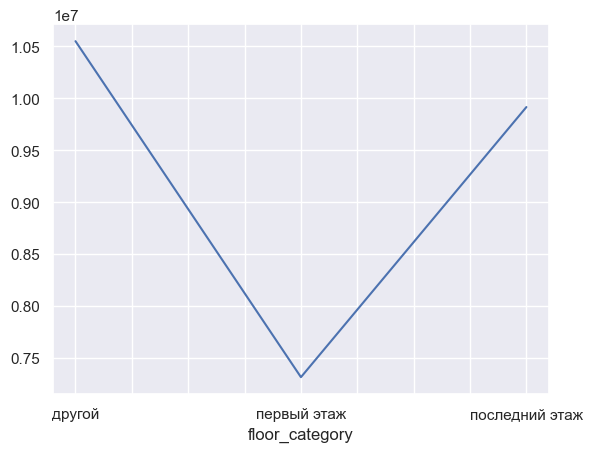

In [155]:
spb_center.groupby('floor_category')['last_price'].mean().plot();

**Промежуточный вывод**:

    Да, зависимость есть. Самые дешевые квартиры - на первом этаже. Самые дорогие - не на первом и не на последнем.

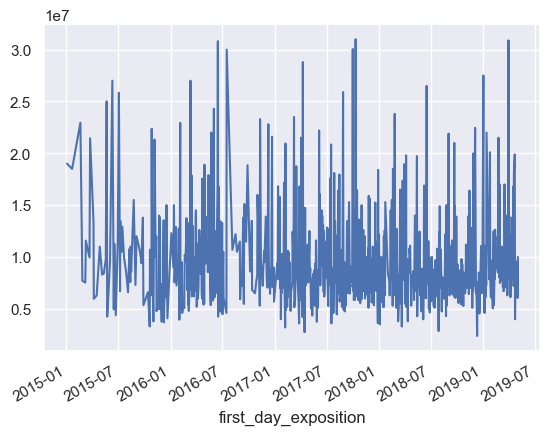

In [156]:
#Линейная диаграмма для центра - дата размещения публикации по оси абцисс, стоимость - по оси ординат.
spb_center.groupby('first_day_exposition')['last_price'].median().plot();

Диаграмма неинформативна. Тут никакой зависимости не видно.

Посмотрим отдельно на день недели, месяц, год - есть ли какая-то зависимость от этих параметров. 

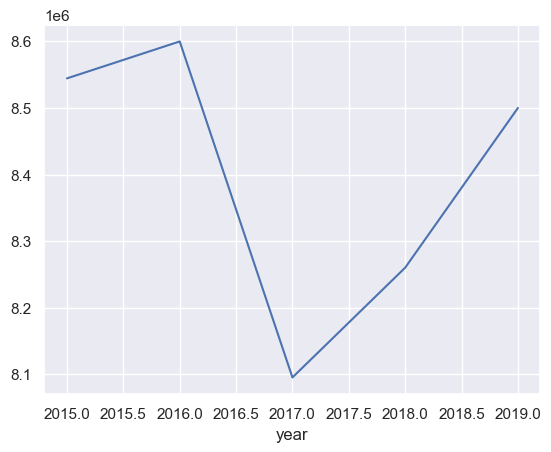

In [157]:
spb_center.groupby('year')['last_price'].median().plot();

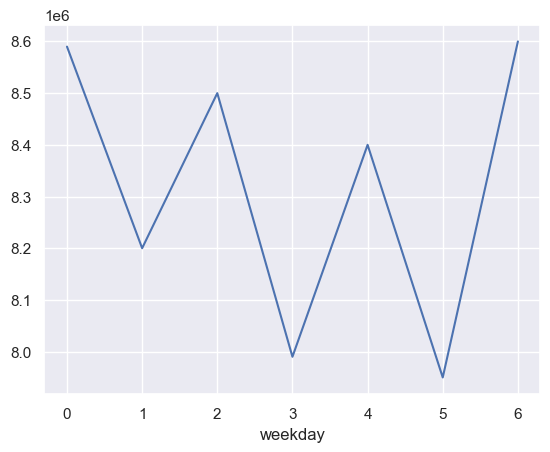

In [158]:
spb_center.groupby('weekday')['last_price'].median().plot();

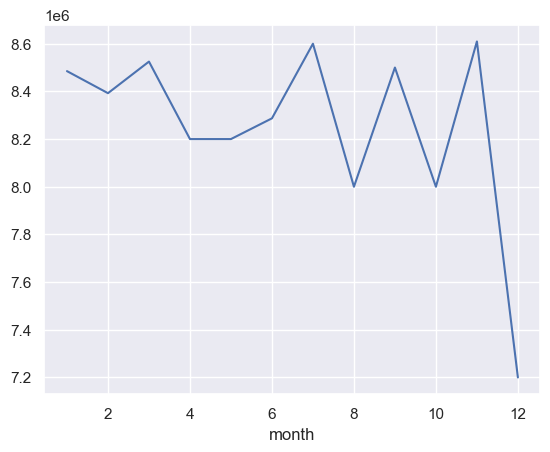

In [159]:
spb_center.groupby('month')['last_price'].median().plot();

**Промежуточный вывод**: 

* Самая высокая цена на квартиры в Санкт-Петербурге была в 2014 году, цена падала до 2015 года, с 2015-2016 цена особо не менялась, с 2016 снова пошла на спад, с 2017 по 2018 держалась на одном (самом низком уровне) и с 2018 снова начала немного расти.

* Самая низкая цена у квартир, объявление о продаже которых опубликовали в пятницу.

* Квартиры, объявления о продаже которых опубликовали в ноябре, резко падают в цене и в декабре цена достигает дна.

Линейные диаграммы для проверки, влияет ли число комнат на стоимость.

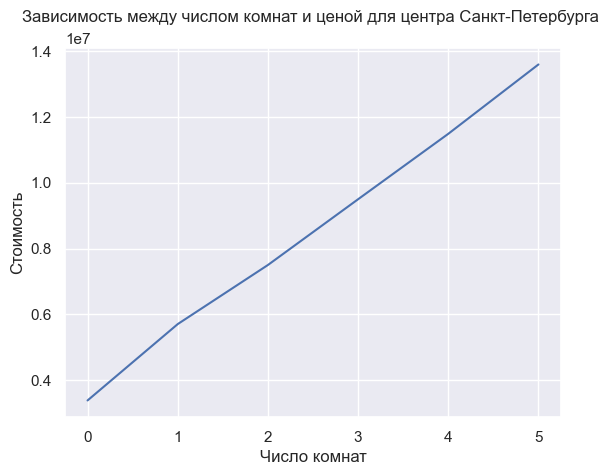

In [160]:
spb_center.groupby('number_of_rooms')['last_price'].median().plot(
    title='Зависимость между числом комнат и ценой для центра Санкт-Петербурга \n', 
    ylabel='Стоимость', xlabel='Число комнат' );

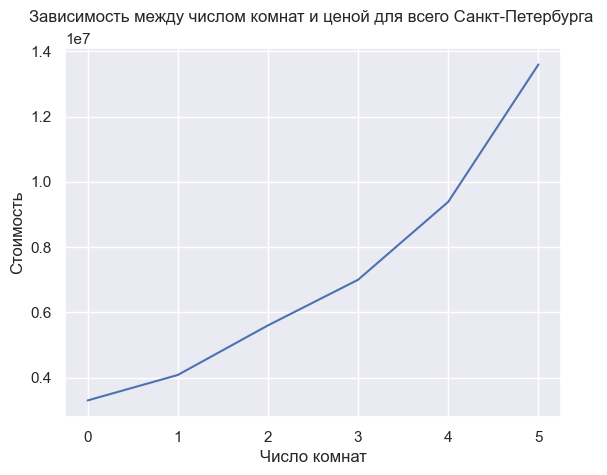

In [161]:
clean_df_spb.groupby('number_of_rooms')['last_price'].median().plot(
    title='Зависимость между числом комнат и ценой для всего Санкт-Петербурга \n', 
    ylabel='Стоимость', xlabel='Число комнат' );

#### Вывод

<div style="border:solid green 2px; padding: 20px"> 

* И для центра, и для всего города есть положительная корреляция между площадью квартиры и ее стоимостью. Коэффициенты Пирсона равны 0,7 и 0,8 соответственно. Чем больше площадь, тем  дороже квартиры.

* Наблюдается зависимость между категорией этажа и стоимостью как для центра, так и для всего города: квартиры на первом этаже самые дешевые. Самые дорогие - это те квартиры, которые находятся не на первом и не на последнем этажах.

* Количество комнат влияет на стоимость квартиры: чем больше комнат - тем выше стоимость. 

* Для всего Санкт-Петербурга есть зависимость (более слабая) между расстоянием до центра и стоимостью квартиры. Чем дальше от центра, тем квартиры дешевле. 

* Самая высокая цена на квартиры в Санкт-Петербурге была в 2014 году. Самые низкие цены были в 2017-2018 гг.

# Общий вывод

**Чтобы определить рыночную стоимость объектов недвижимости следует учитывать следующие параметры:**

* Общая площадь. Объекты с общей площадью в 350 м.кв. и больше считаются редкими. Аномально редкое значение - 900 м.кв. В среднем площадь составляет от 30 до 47 м2 кв.м. Чем больше площадь, тем выше стоимость.

* Количество комнат. Объекты с количеством комнат больше 6 встречаются редко. Аномально редкое значение - 19. Чем больше комнат, тем выше стоимость. 

* Этаж. Самые дешевые объекты на первом этаже. Самые дорогие - на других этажах, кроме первого и последнего.

* Расстояние до центра. Центр города Санкт-Петербурга ограничен окружностью радиусом в 8 км. Для всего города фактор близости слабо, но влияет на стоимость жилья: чем дальше от центра, тем дороже объект недвижимости.

* Высота потолка. Объекты недвижимости с высотой потолка больше или равной 4 кв.м или меньше 2.25 считаются редкими. В среднем высота потолков: 2.5 - 2.7 метров. Этот фактор на стоимость жилья влияет довольно слабо.

* Населенный пункт. Самый дорогой объект недвижимости  - в крупном городе, в Санкт-Петербурге.


**При построении автоматизированной системы, которая детектирует аномалии и мошенническую деятельность, следует учесть следующие аномальные значения параметров:**

* Аномально большой по общей площади объект недвижимости имеет площадь 900 м.кв. Объекты с площадью *в 350 м.кв. и больше* считаются редкими и составляют 0.17% от всей выборки в данном исследовании.

* Аномально дорогой объект недвижимости имеет стоимость 763 000 000 млн. рублей. Аномально дешевый объект недвижимости имеет стоимость в 12 190 рублей. В целом объекты недвижимости дороже 36 000 000 млн рублей и дешевле 400 000 тыс рублей составляют 1 % от выборки.

* Аномально редкое количество комнат - 19. В целом объекты с количеством комнат *больше 6* встречаются редко, их процент составляет 0.8% от всей выборки в данном исследовании.

* Аномально низкий потолок - 1 метр. Аномально высокий - 100 метров. Объекты недвижимости с высотой потолка *больше или равной 4 кв.м или меньше 2.25* считаются редкими и составляют 0.6 % от всей выборки в данном исследовании.

* Аномально короткий срок длительности публикации о продаже недвижимости - 1 день. Аномально длинный - 1580 дней (4 года 4 месяца). Объекты недвижимости, срок длительности публикации у которых равен 1 дню или больше или равен 512 дням (1 год 5 месяцев), считаются редкими и выбивающимися. Такие случаи составляют 7.1% от всей выборки.

# Спасибо за внимание!